<a href="https://colab.research.google.com/github/ritikkumar005/alma_better_capstone_project_EDA/blob/main/Bike_sharing_demand_prediction_capstone_project_Ritik_kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Bike sharing demand prediction






Project Type - Regression

Contribution - Individual

Project Description -
Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort . It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time . Eventually , providing the city with a stable supply of rental bikes becomes a major concern




Project summary - The goal of this project is to develop a predictive model that can accurately forecast demand for bike rentals in Seoul, South Korea, based on historical usage patterns, - weather conditions, and other relevant factors. The project involves data collection, data preparation, feature engineering, model selection, hyperparameter tuning, model training and model evaluation.

The project aims to help the bike-sharing program in Seoul optimize its resources, improve user satisfaction, and reduce operating costs. The project will leverage machine learning techniques and statistical analysis to build a robust and accurate predictive model that can help the bike-sharing program make data-driven decisions.

Dataset description - The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



Problem statement - The bike-sharing program in Seoul, South Korea, is experiencing low utilization rates and inefficient allocation of resources. The goal of this project is to develop a predictive model that can accurately forecast demand for bike rentals based on historical usage patterns, weather conditions, and other relevant factors. By doing so, we aim to help the bike-sharing program optimize its resources, improve user satisfaction, and reduce operating costs.

Buisness Context




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge , Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/alma better/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
dataset.tail(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Observation =
1. null values/missing values - 0
2. date - columns need to convert into proper data type
3. columns to convert into numeric (for modelling purpose)


*   seasons
*   holiday
*   funtioning day

4. rename columns-


*  temperature
*  humidity
*  wind speed
*  visibility
*  dew point temperature
*  solar radiation
*  rainfall
*  snowfall
*  rented bike count , funtionting day















In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#renaming columns
dataset.rename(columns = {'Rented Bike Count':'Rented_Bike_Count', 'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity',
       'Wind speed (m/s)':'Wind_speed', 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_point_temperature',
       'Solar Radiation (MJ/m2)':'Solar_Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall',
       'Functioning Day':'Functioning_Day'}, inplace= True)

In [ ]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
 dataset['Date']=dataset['Date'].astype(np.datetime64)

In [ ]:
dataset.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

In [ ]:
dataset['Month']= dataset['Date'].dt.month
dataset['Day']= dataset['Date'].dt.day_name()


In [ ]:
dataset.head(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  
0  Winter  No Holiday             Yes      1  Thursday  
1  Winter  No Holiday             Yes      1  Thursday  
2  Winter  No Holiday             Yes      1  Thursday  
3  Winter  No Holiday             Yes      1  Thursday  
4  Winter  No Holiday             Yes      1  Thursday

In [ ]:
#dataset.drop(['Date','Day'],axis = 1 , inplace = True)

In [ ]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'Month', 'Day'],
      dtype='object')

In [ ]:
#get distinct category count for seasons
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#distinct count of holiday categories
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#dataset['Weekdays_or_weekend'].value_counts()

In [ ]:
dataset.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        Month  
count  8760.000000  8760.000000  
mean      0.075068     6.526027  
std       0.436746     3.448048  
min       0.000000     1.000000  
25%       0.000000     4.000000  
50%       0.000000     7.000000  
75%       0.000000    10.000000  
max       8.800000    12.000000

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
#checking null values
dataset.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
dtype: int64

Text(0.5, 1.0, 'Visualization of missing values ')

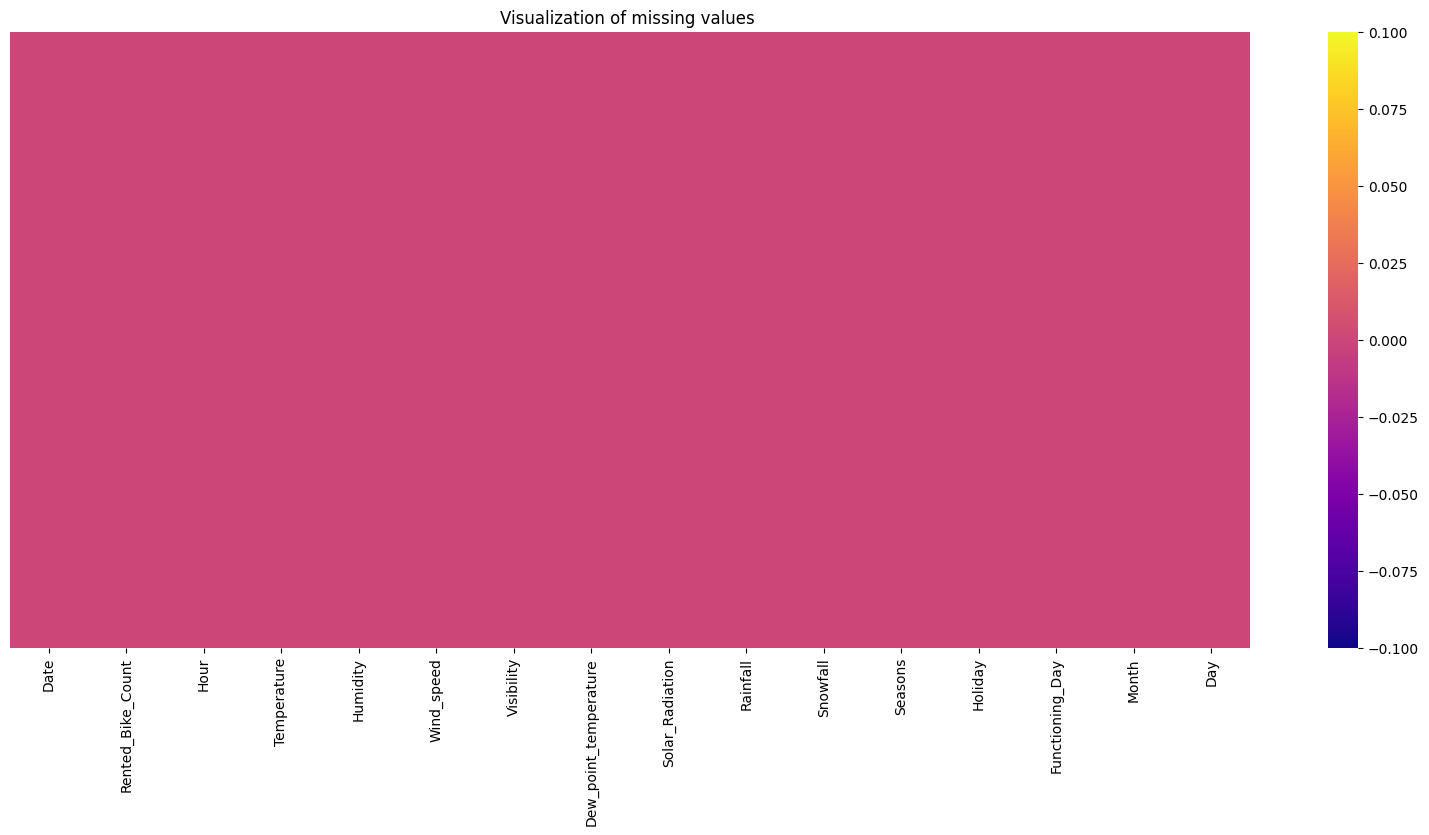

In [ ]:
#Visualizing null values using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(dataset.isnull(),cmap='plasma',annot= False , yticklabels = False)
plt.title("Visualization of missing values ")

In [ ]:
#checking duplicate rows
duplicate = dataset.duplicated().sum()
print(duplicate)

0


In [ ]:
dataset.drop(['Date'],axis = 1 , inplace = True)

In [ ]:
numerical_data = list(set(dataset.describe().columns.tolist())-{'Hour','month'})

categorical_data = list(set(dataset.columns)-set(numerical_data))

What all manipulations have you done and insights you found?

1) Changed Date column datatype from object to Datetime data type.

2) Created new columns Day and Month from date column and dropped Date.

3) Defining separate data as numerical and categorical data .

DATA VISUALIZATION AND STORY TELLIING


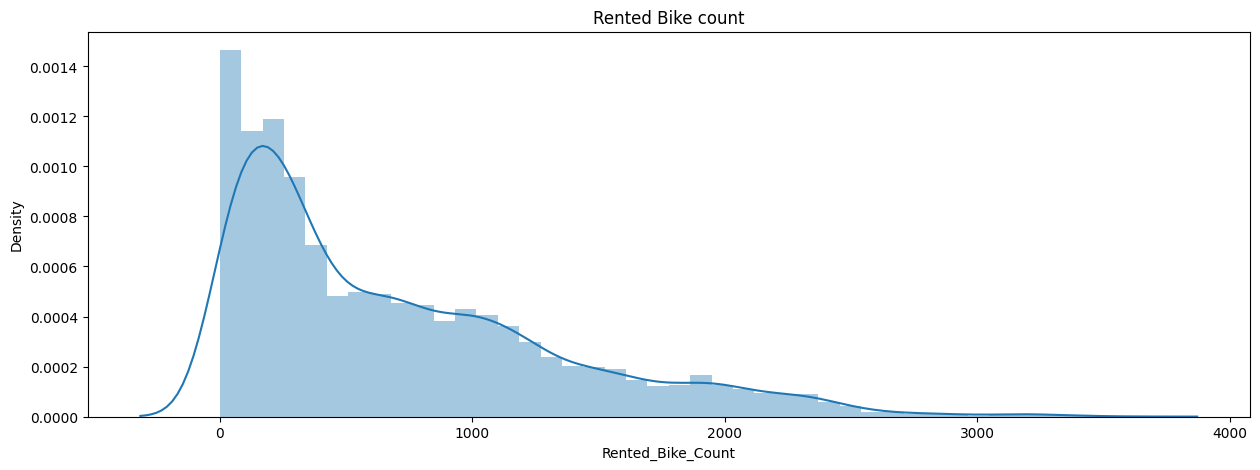

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Rented Bike count')
sns.distplot(dataset['Rented_Bike_Count'])
plt.show()

1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

2. What is/are the insight(s) found from the chart?

Data is positively skewed may need to transform it further.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

As of now we know that the data is positively skewed that means the bike demand for smaller bulks is more.

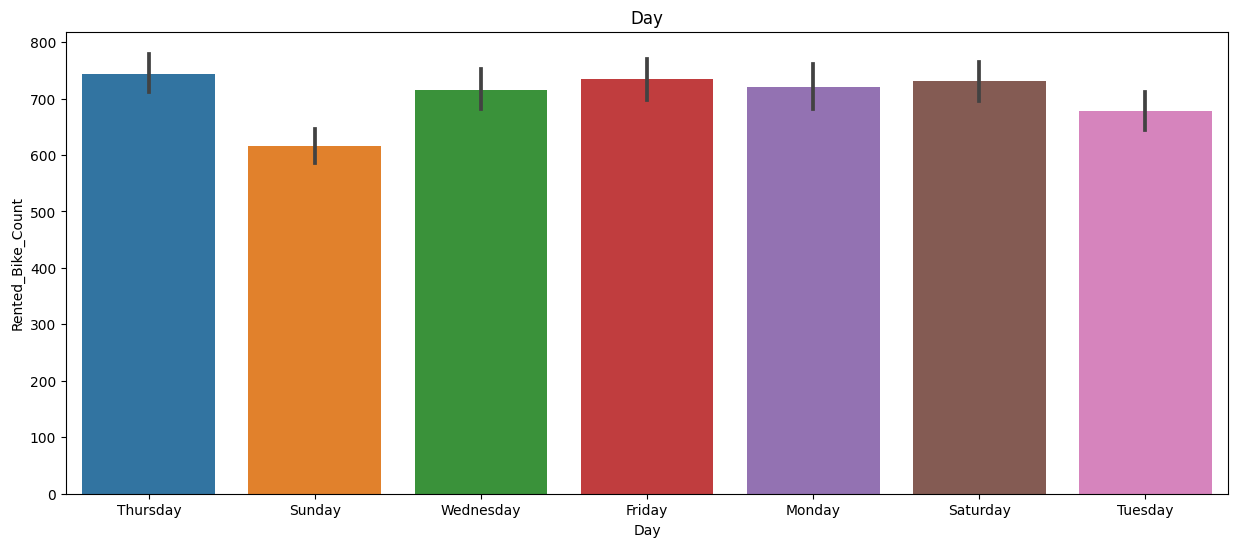

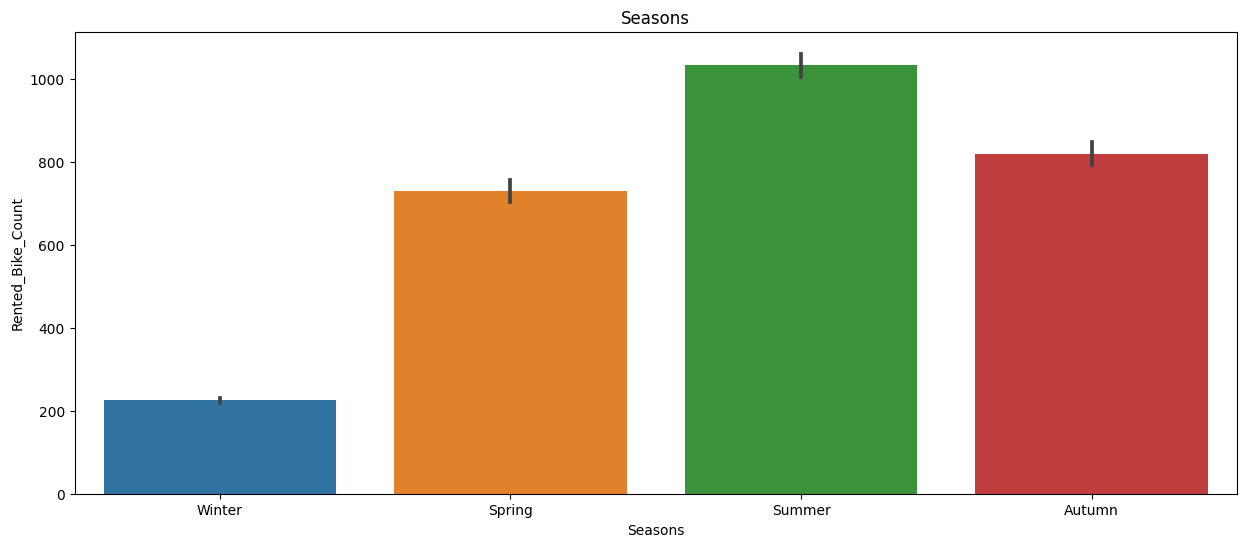

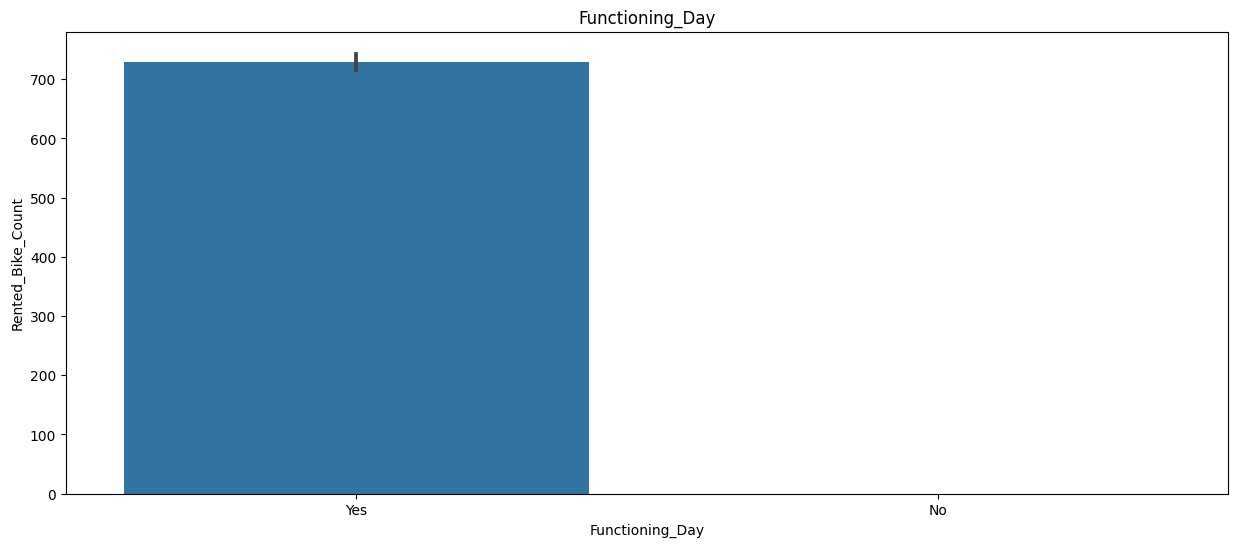

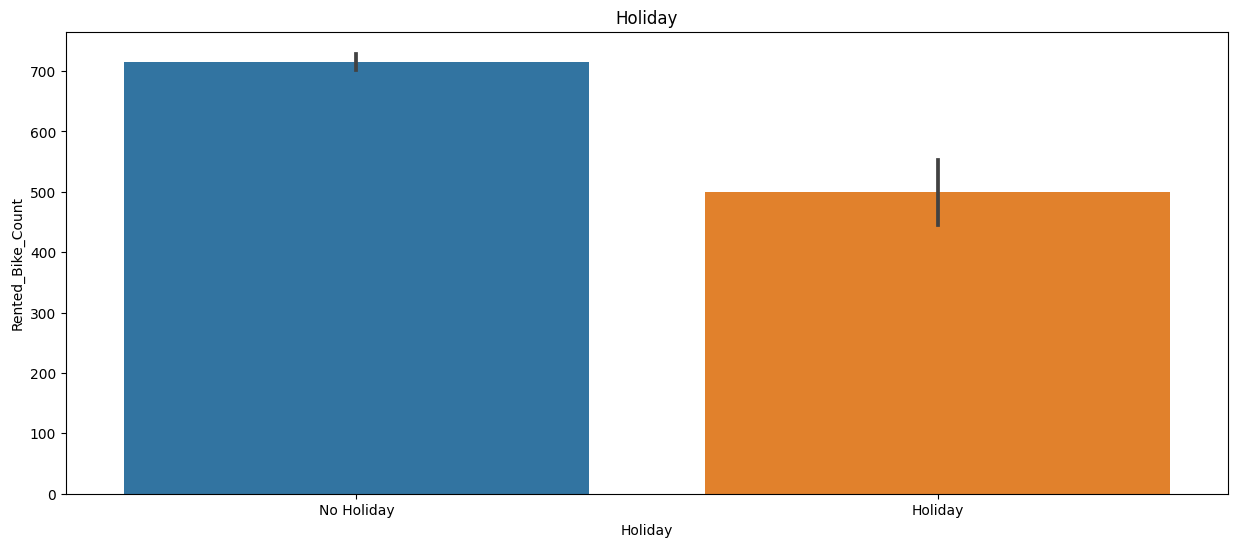

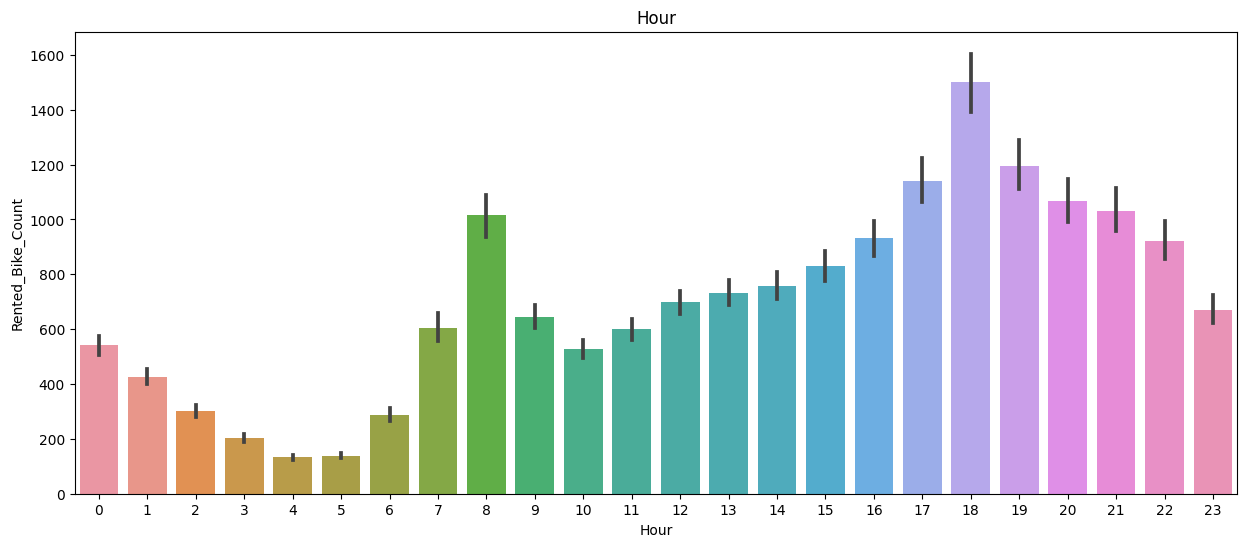

In [ ]:
#visualization of categorical data with respect to rented bike count
for i in categorical_data :
  plt.figure(figsize=(15,6))
  plt.title(i)
  sns.barplot(x=dataset[i],y=dataset['Rented_Bike_Count'])
  plt.show()

1. Why did you pick the specific chart?

To visualise and spread categorical data with respect to Rented Bike Count.

2. What is/are the insight(s) found from the chart?

1) The peak hours of rented bikes is 5:00PM-7:00PM and the least bikes are rented between 3:00AM to 5:00AM.

2) June is the peak and January is the bottom months for number of rented bikes.

3) Highest no. of bikes are booked on Thursday and the least on Sunday.

4) People prefer renting bikes most in the Summer season and the least in winter season.

5) People rented more bikes on a non-holiday compared to a holiday.

6) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how time, month, day, season and holiday impact the number of rented bikes, we can make strategies accordingly

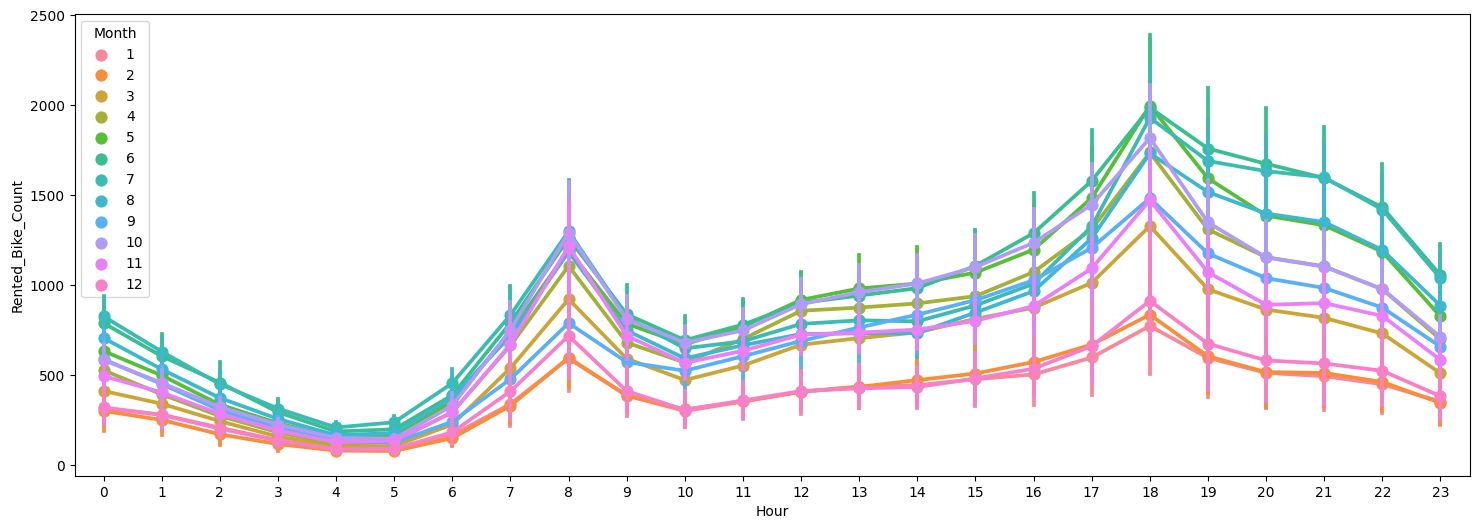

In [ ]:
#Visualization chart for Bike rent count with respect to hours on months

plt.figure(figsize=(18,6))
sns.pointplot(x=dataset['Hour'],y=dataset['Rented_Bike_Count'],hue = dataset['Month'])
plt.show()

1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

2. What is/are the insight(s) found from the chart?

June is the peak and January is the bottom months for number of rented bikes.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how month impact the number of rented bikes, we can make strategies accordingly

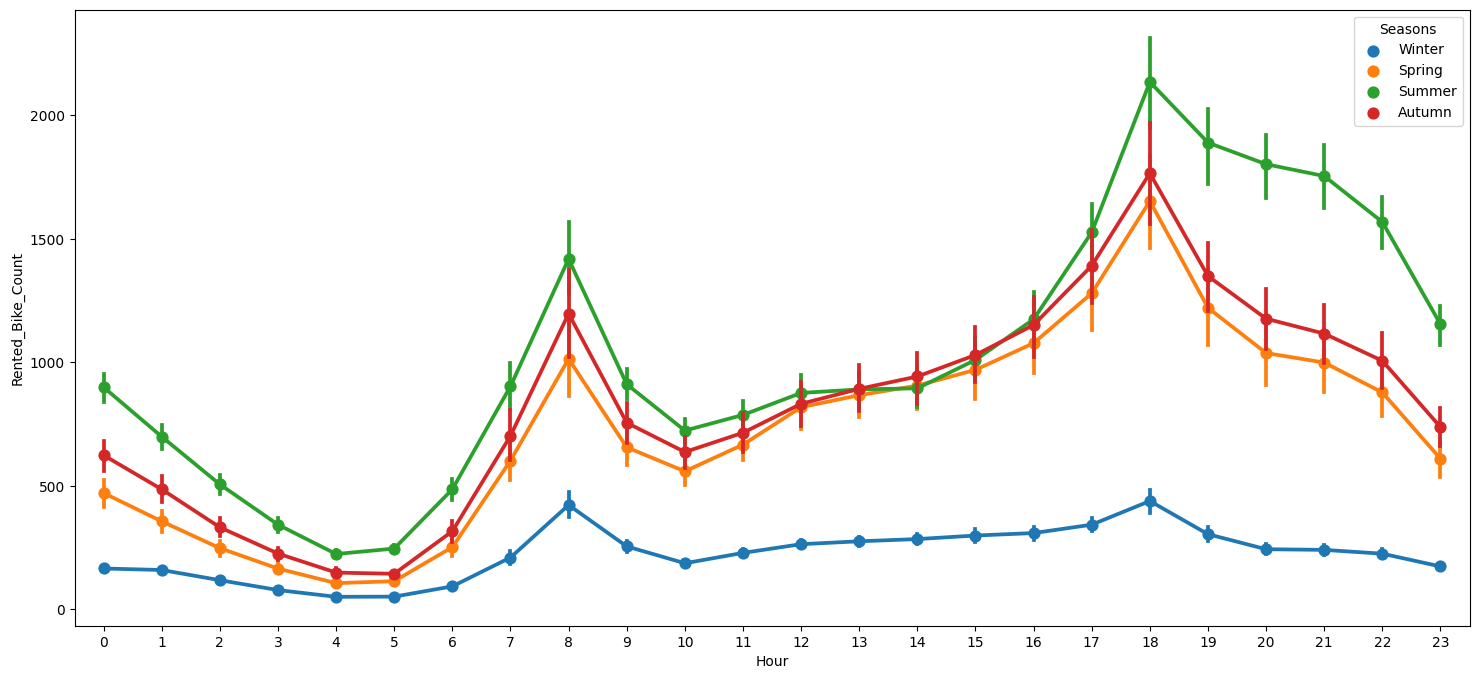

In [ ]:
#Bike rent count trend with respect hours on seasons
plt.figure(figsize=(18,8))
sns.pointplot(x=dataset['Hour'],y=dataset['Rented_Bike_Count'],hue = dataset['Seasons'])
plt.show()

1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

2. What is/are the insight(s) found from the chart?

People prefer renting bikes most in the Summer season and the least in winter season.

3. Will the gained insights help creating a positive business impact?


Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Seasons impact the number of rented bikes, we can make strategies accordingly.

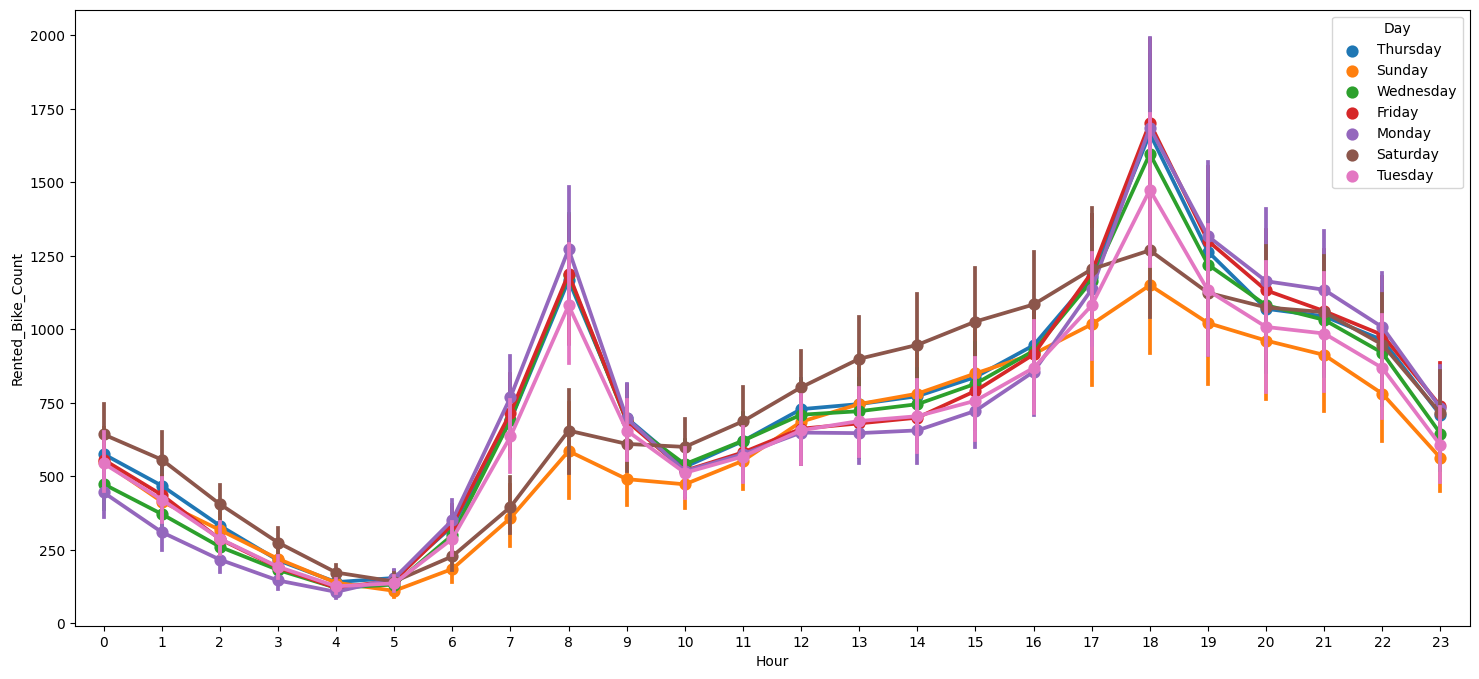

In [ ]:
#Bike rent count trend with respect hourse on days

plt.figure(figsize= (18,8))
sns.pointplot(x=dataset['Hour'],y=dataset['Rented_Bike_Count'],hue=dataset['Day'])
plt.show()


1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Day.

2. What is/are the insight(s) found from the chart?

Highest no. of bikes are booked on Thursday and the least on Sunday.

3. Will the gained insights help creating a positive business impact?▸

Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.


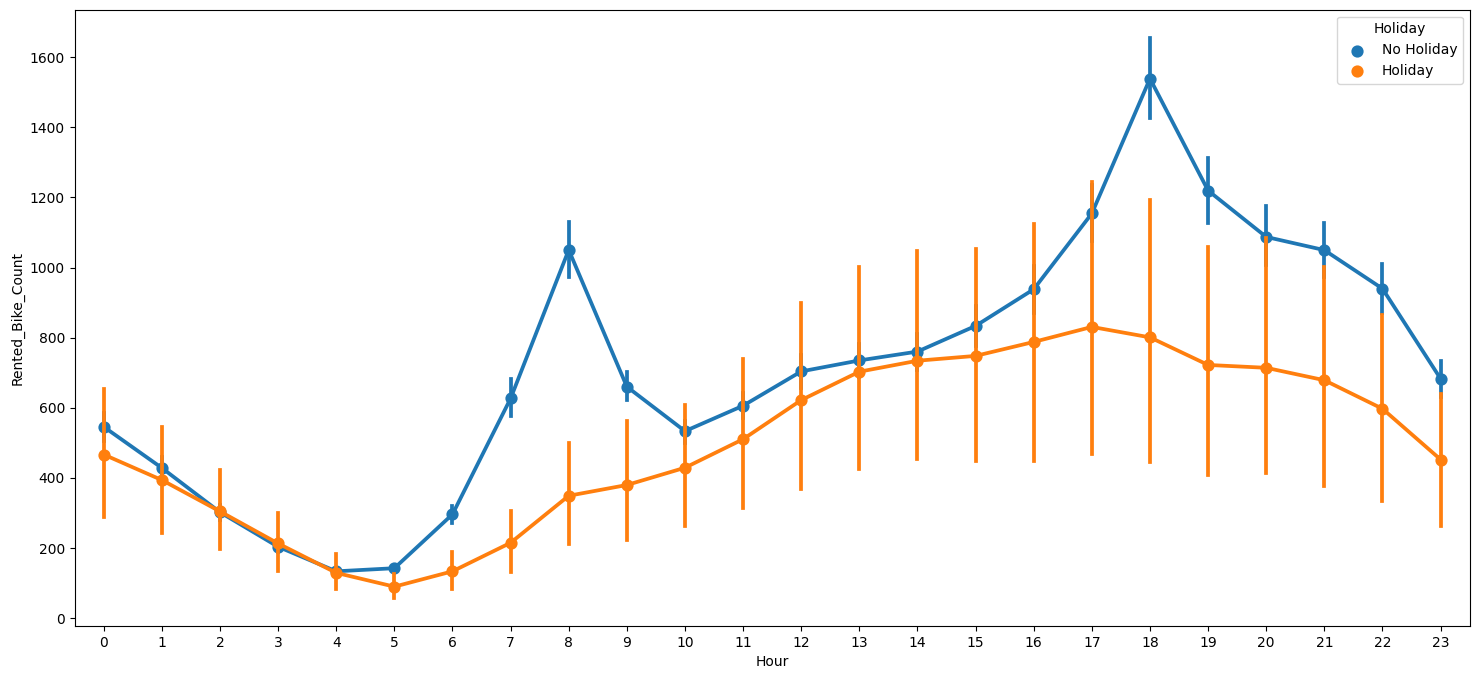

In [ ]:
#bike rent count trend with respect hours on holidays
plt.figure(figsize= (18,8))
sns.pointplot(x=dataset['Hour'],y=dataset['Rented_Bike_Count'],hue=dataset['Holiday'])
plt.show()

1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Holiday.

2. What is/are the insight(s) found from the chart?

People rented more bikes on a non-holiday compared to a holiday.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Holidays impact the number of rented bikes, we can make strategies accordingly.


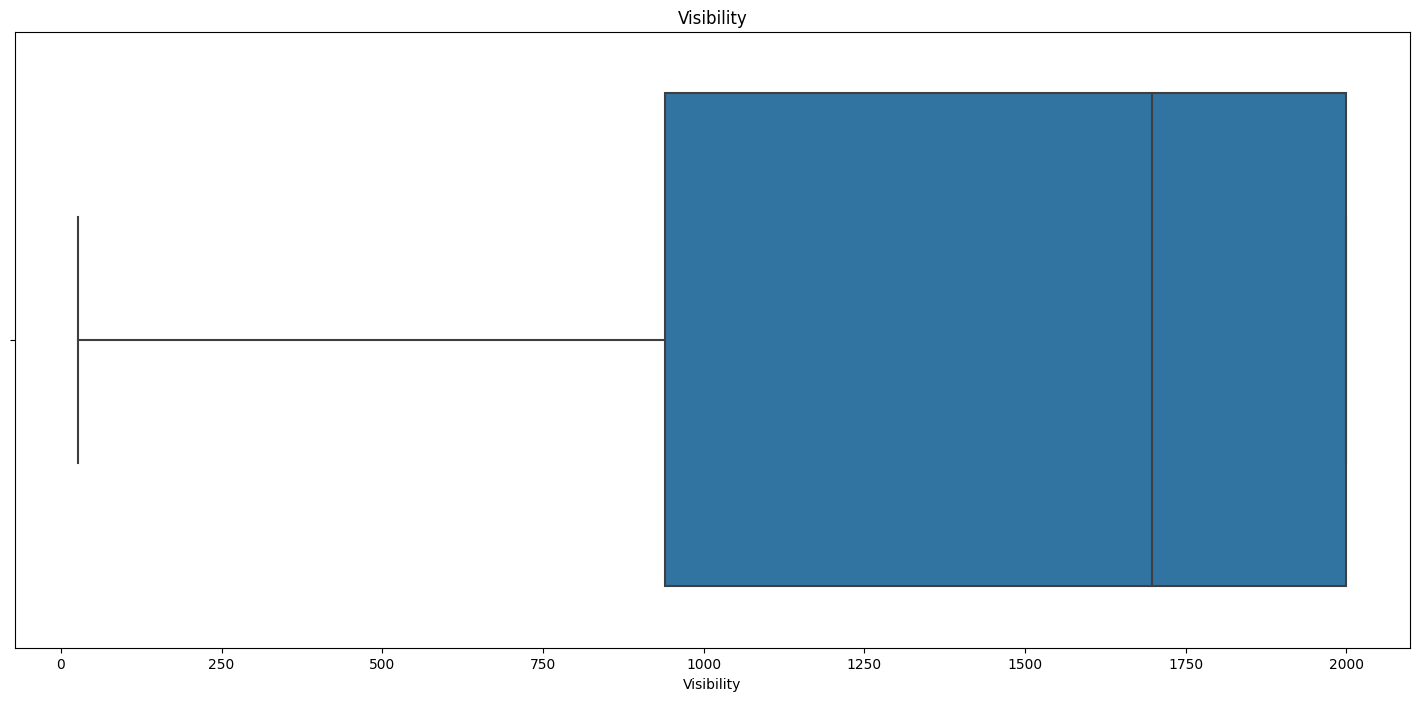

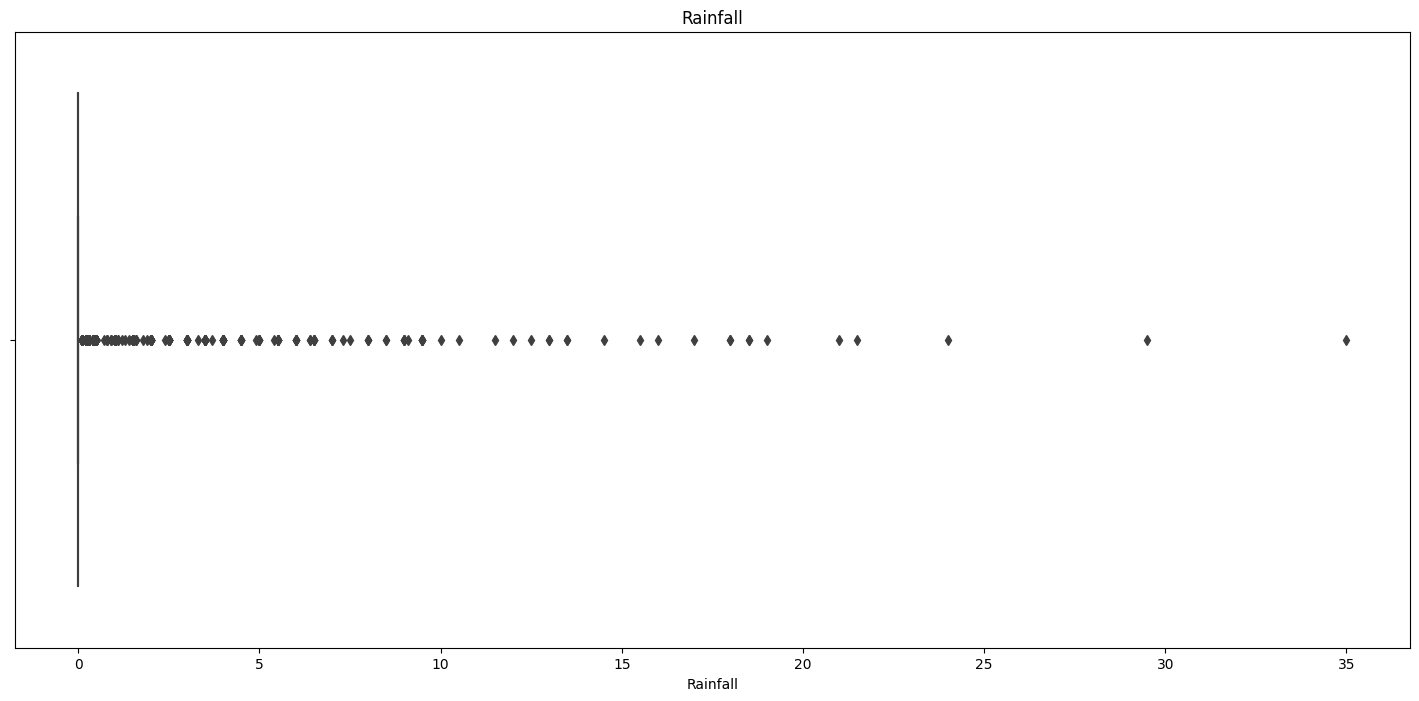

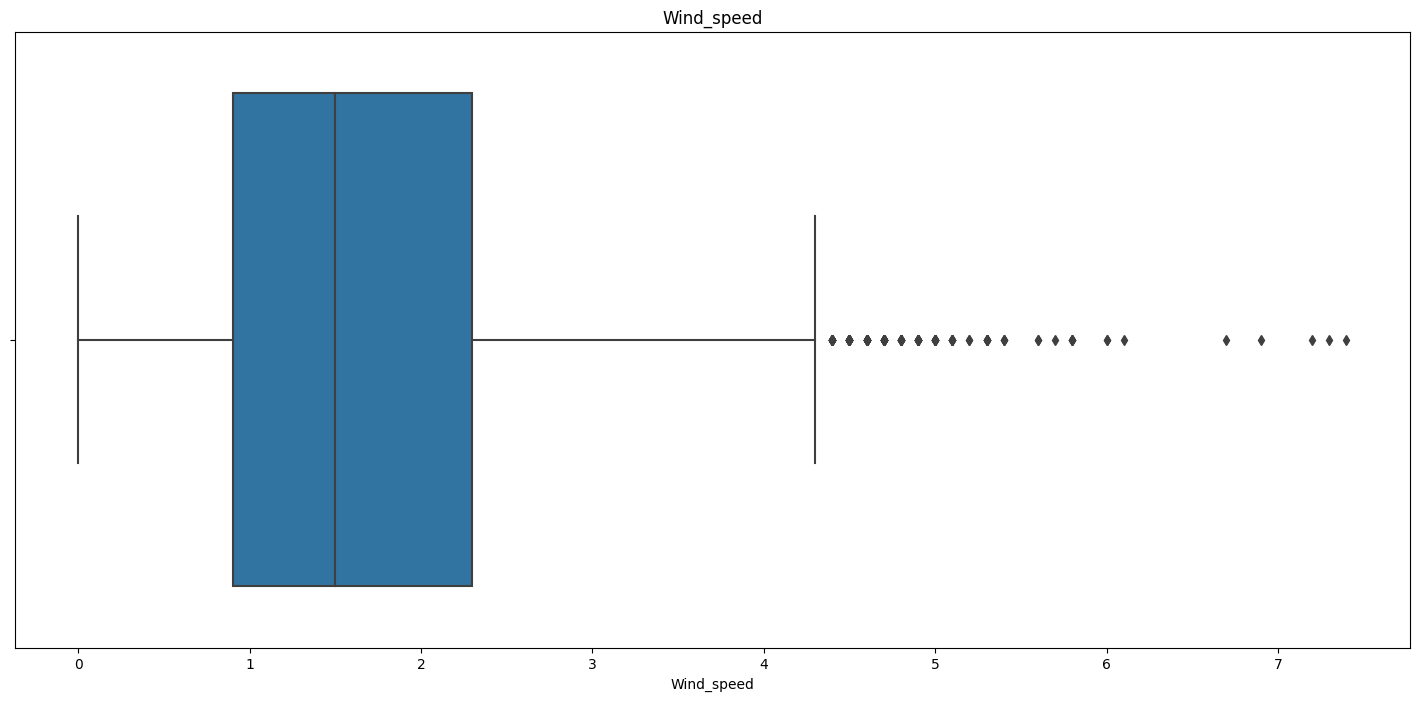

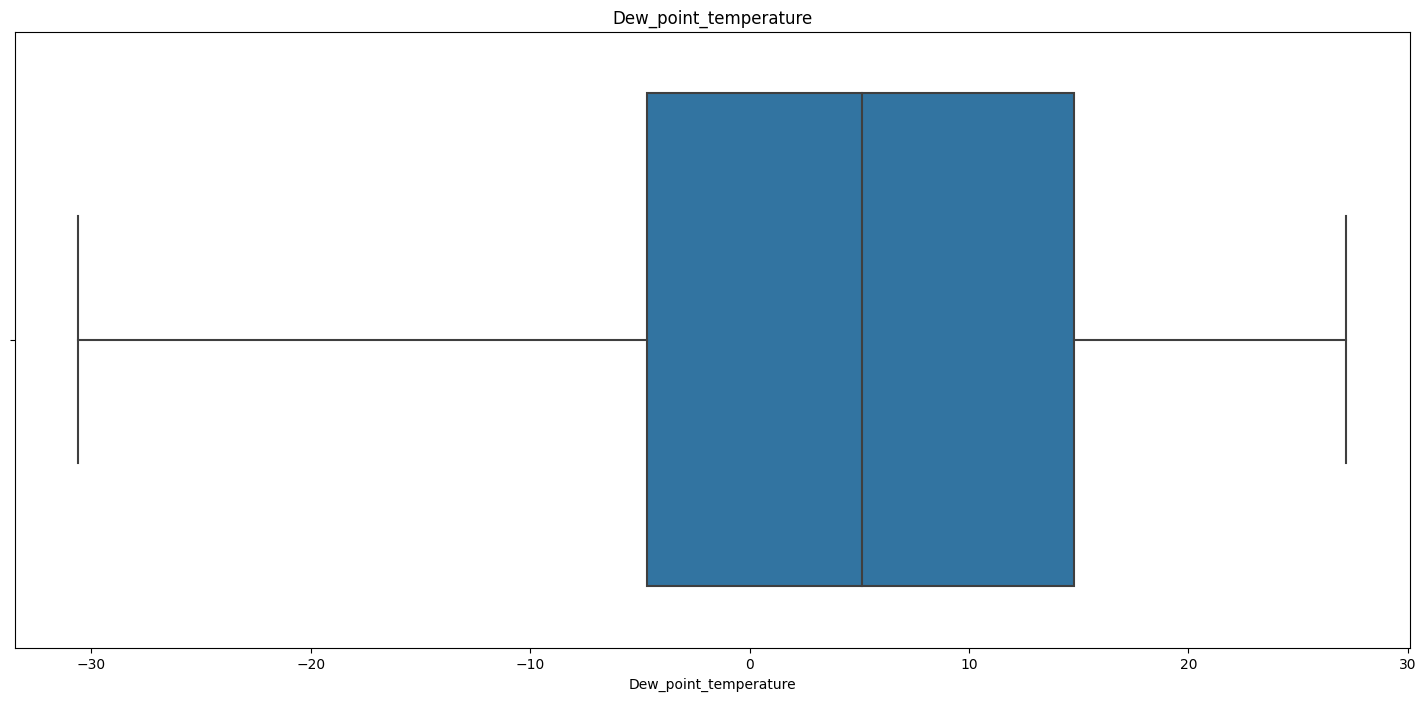

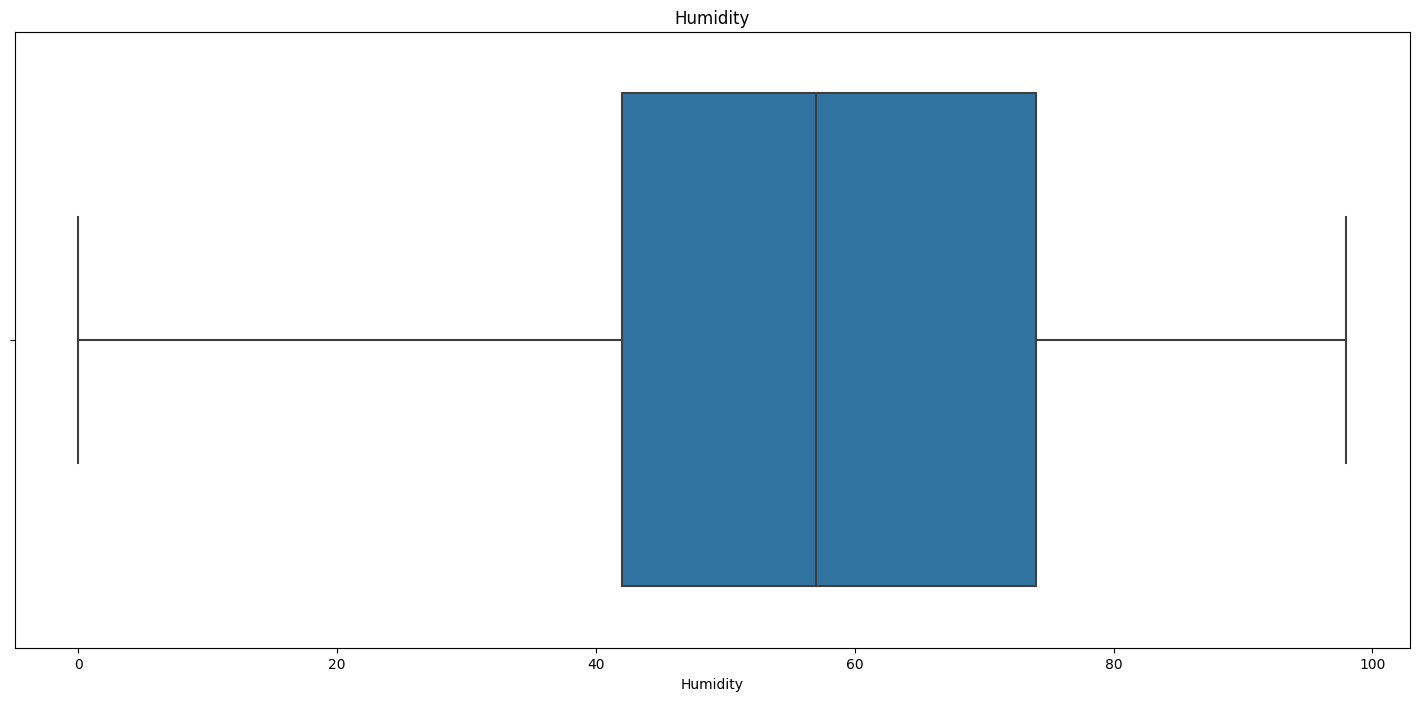

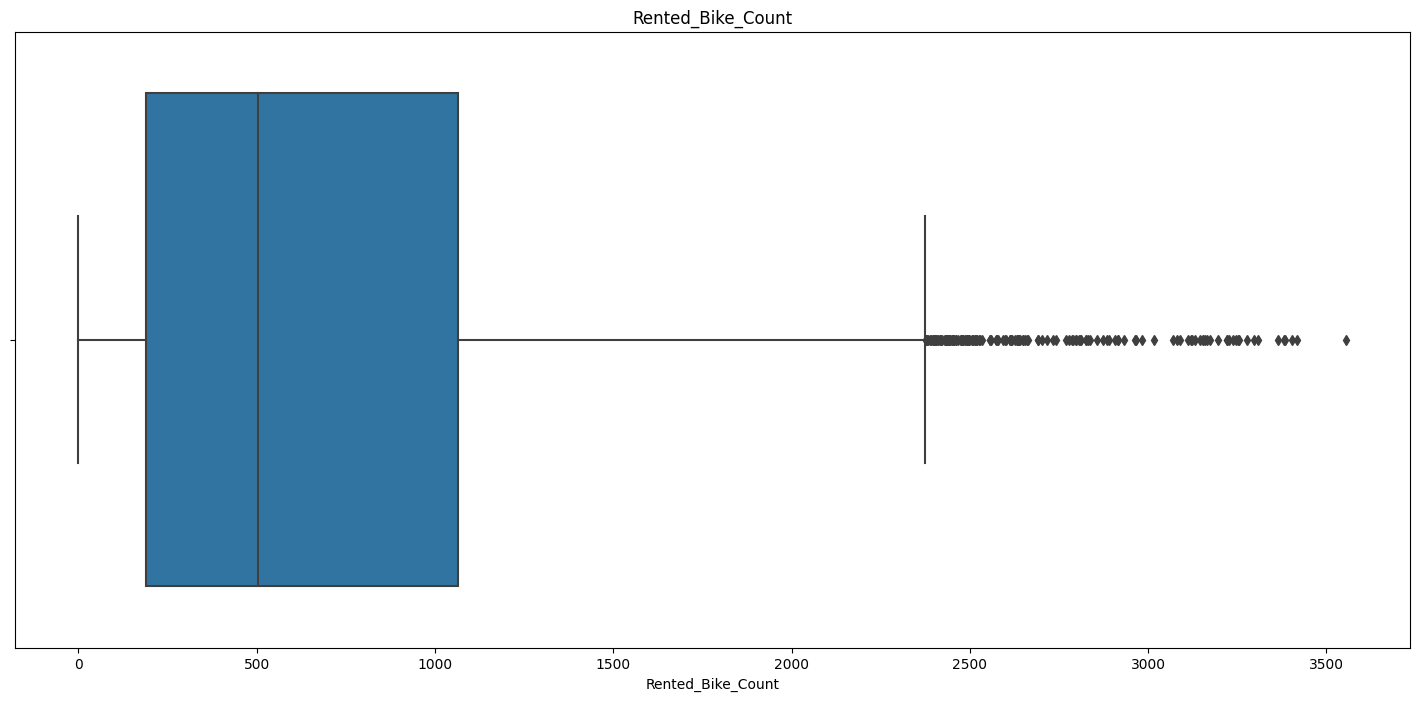

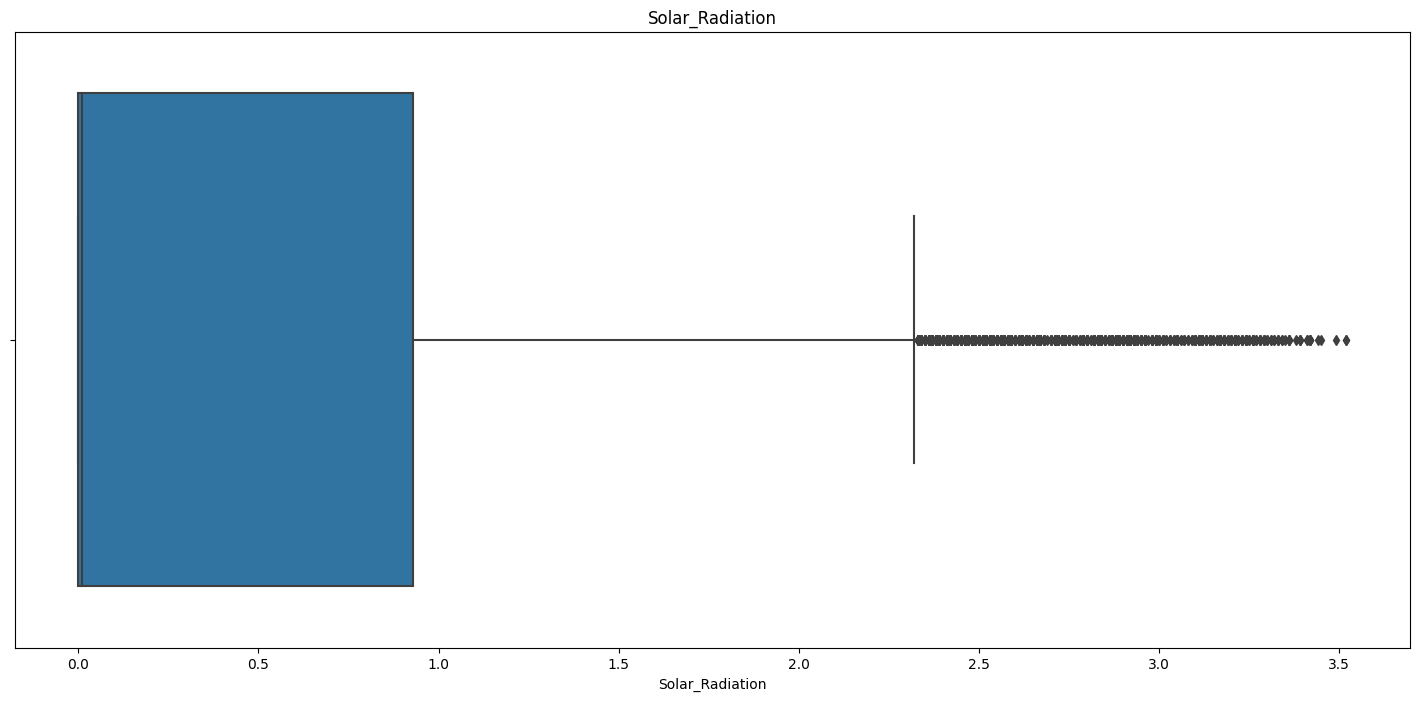

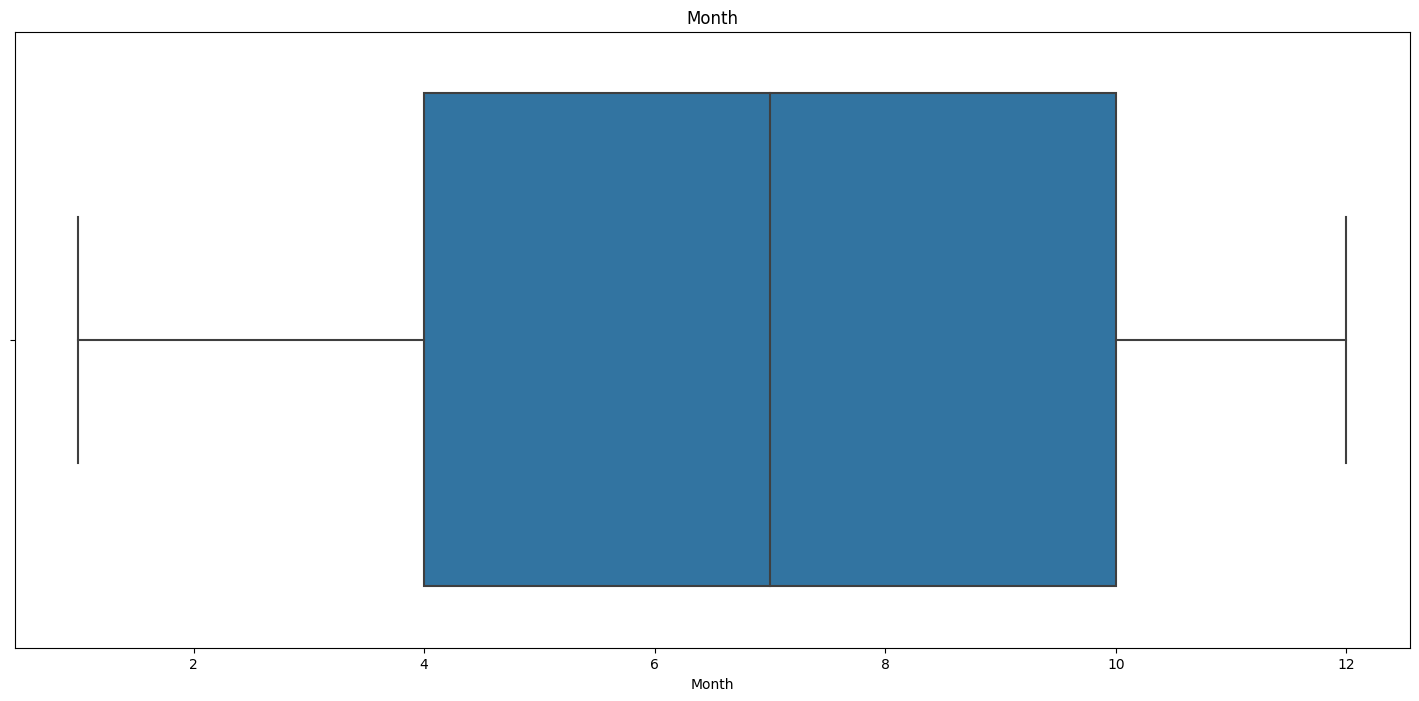

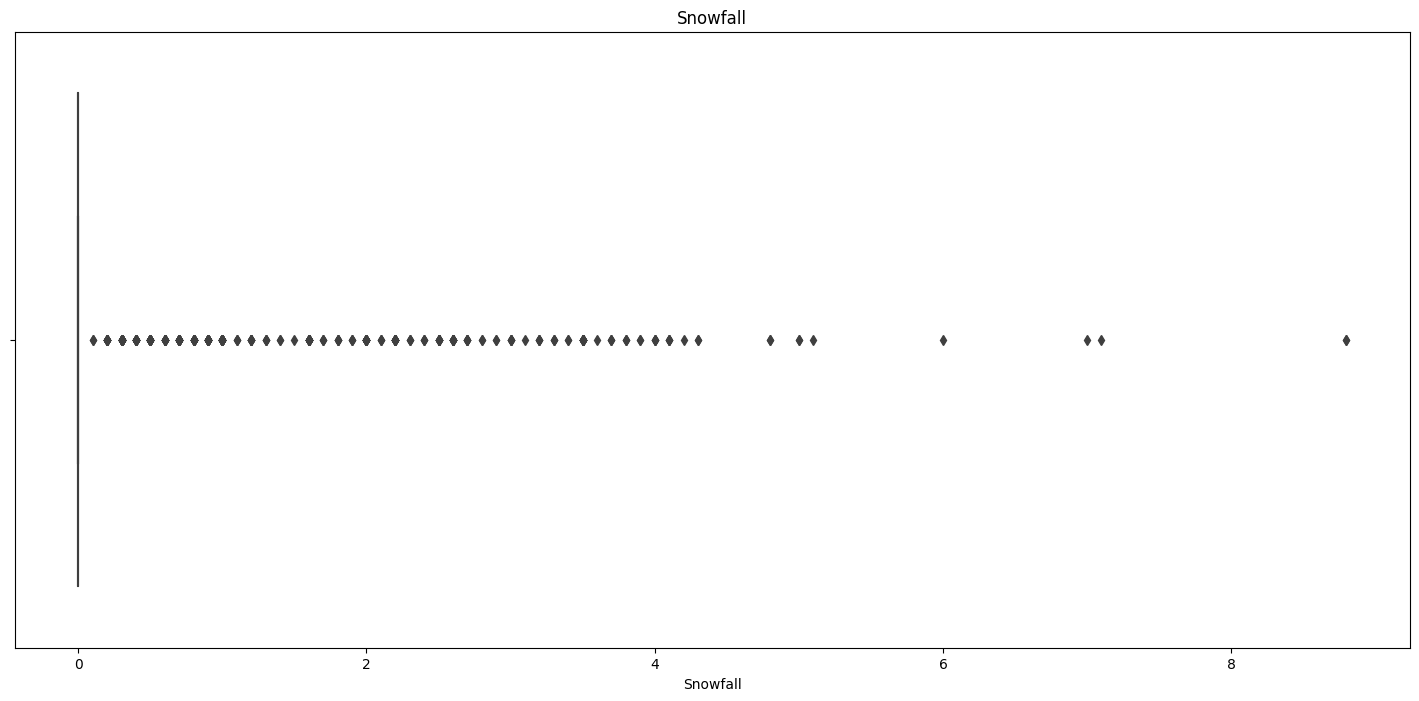

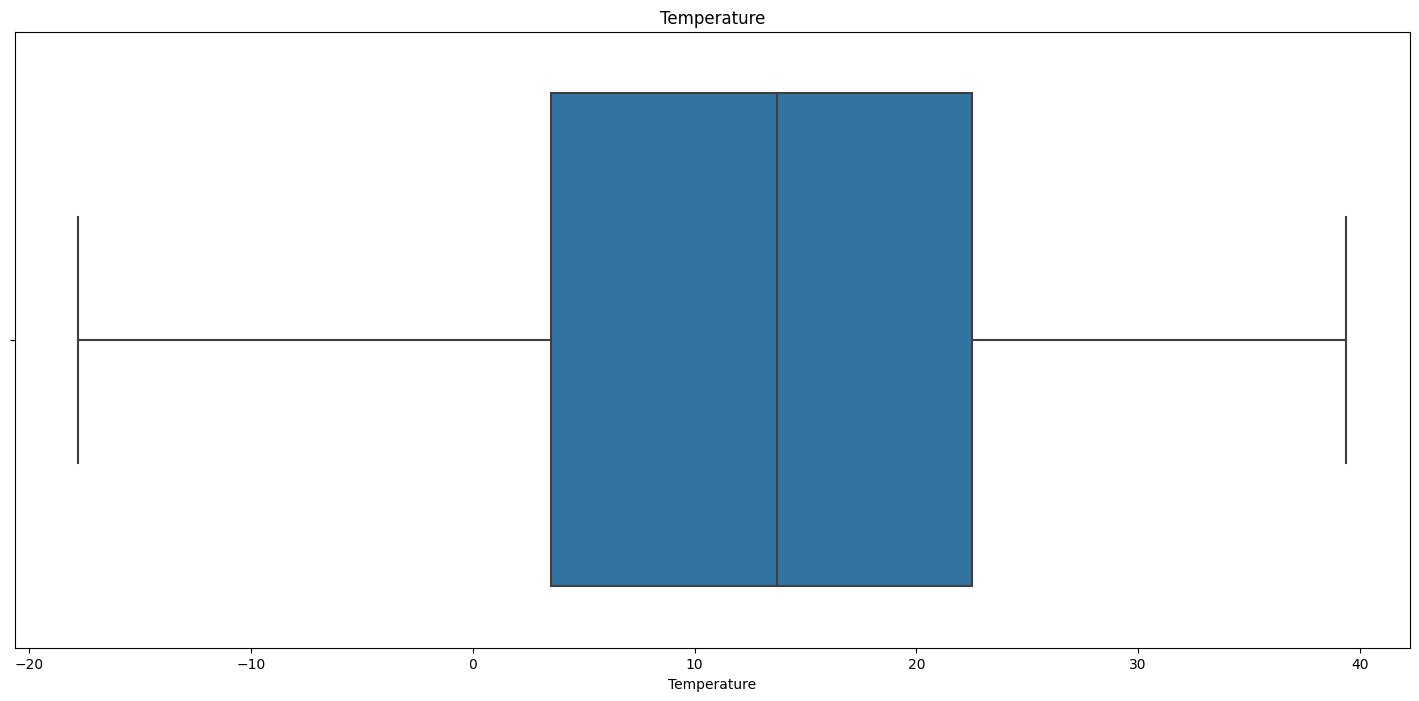

In [ ]:
#Visualizing outliers using box plot
for i in numerical_data:
  plt.figure(figsize=(18,8))
  sns.boxplot(x=dataset[i])
  plt.title(i)
  plt.show()

1. Why did you pick the specific chart?

Using Boxplots as we need to identify outliers.

2. What is/are the insight(s) found from the chart?

Rainfall, Solar Radiation, Snowfall and Windspeed has high numbers of outliers.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

In some cases, outliers may represent opportunities for business growth. For example, if there are a small number of customers who are making a significantly higher number of bike rentals than the average customer, this may represent a market segment that can be targeted for special promotions or marketing campaigns.

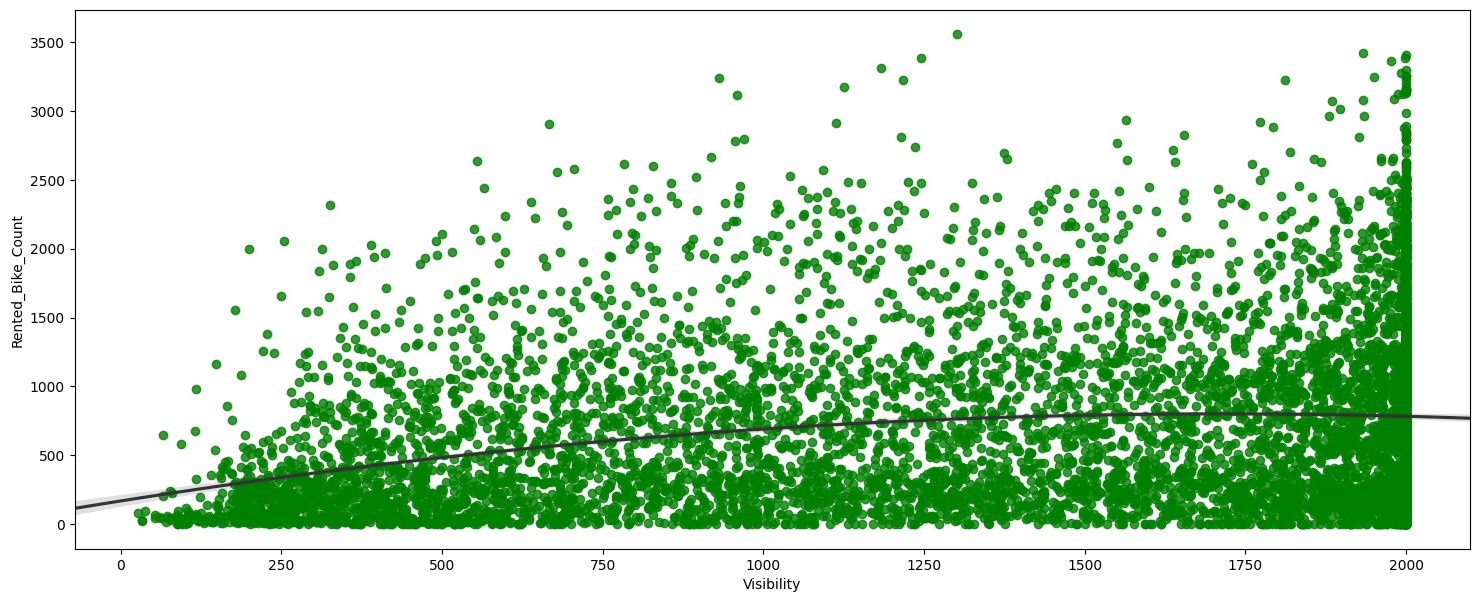

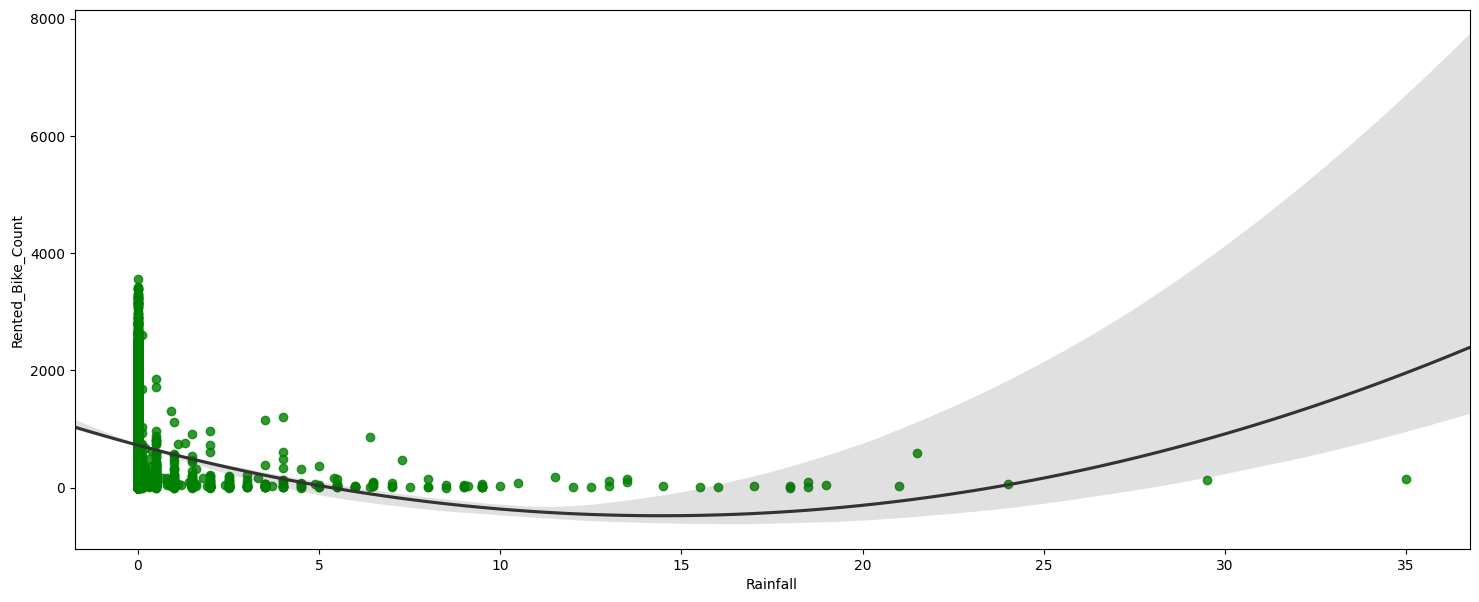

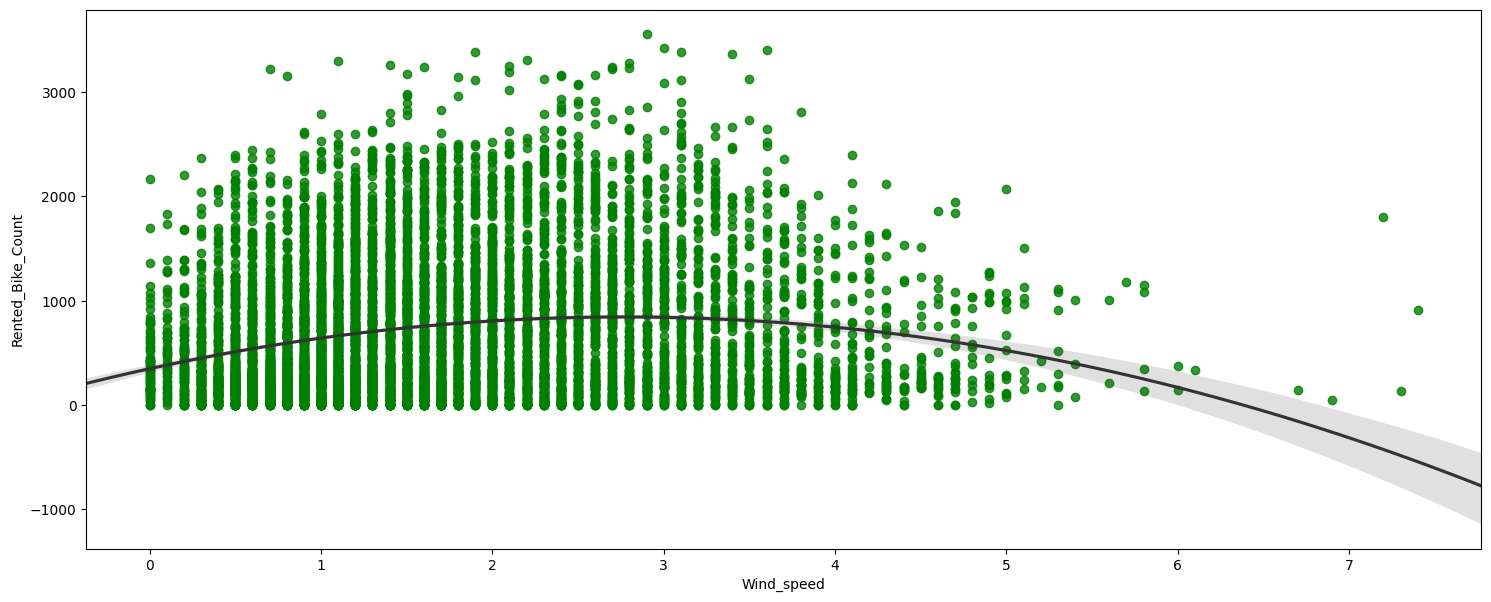

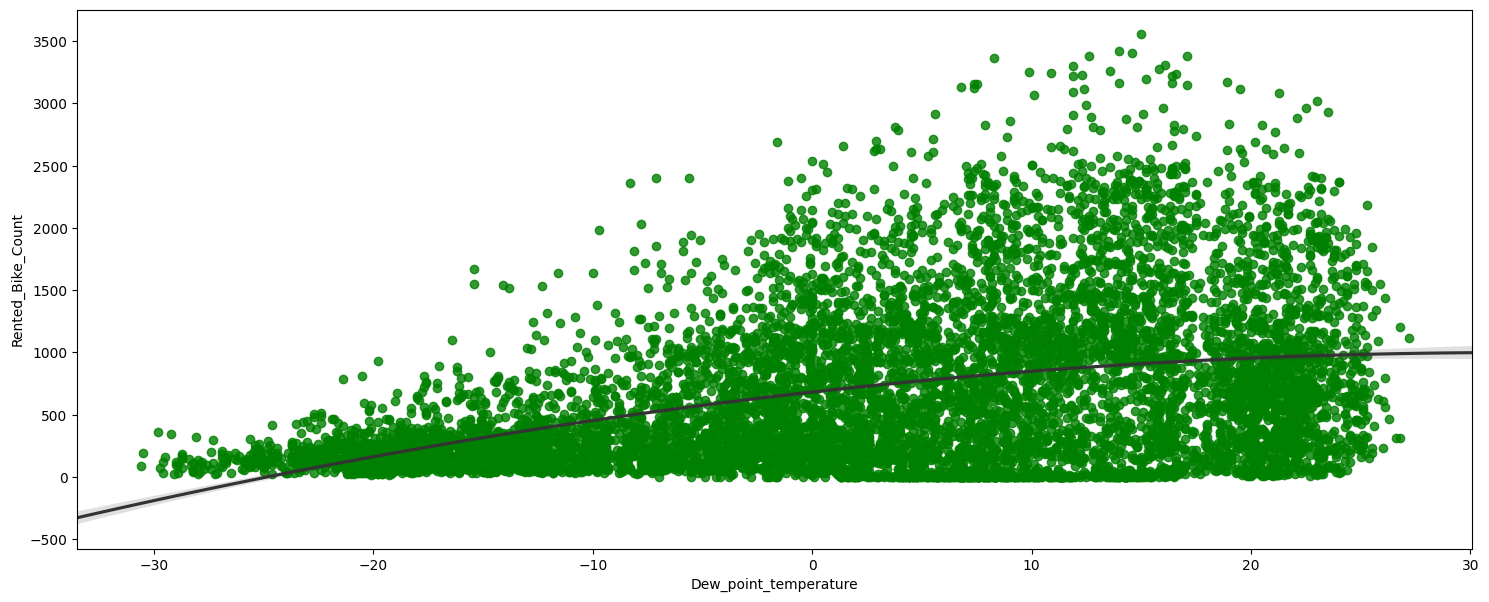

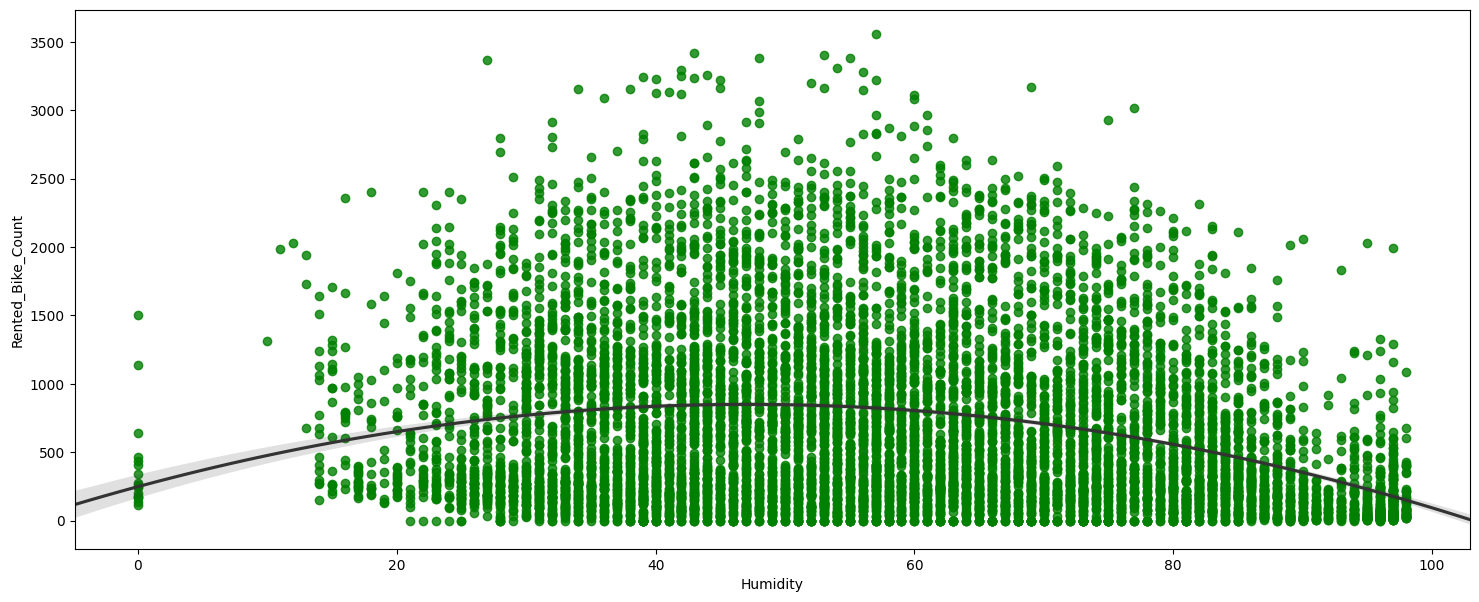

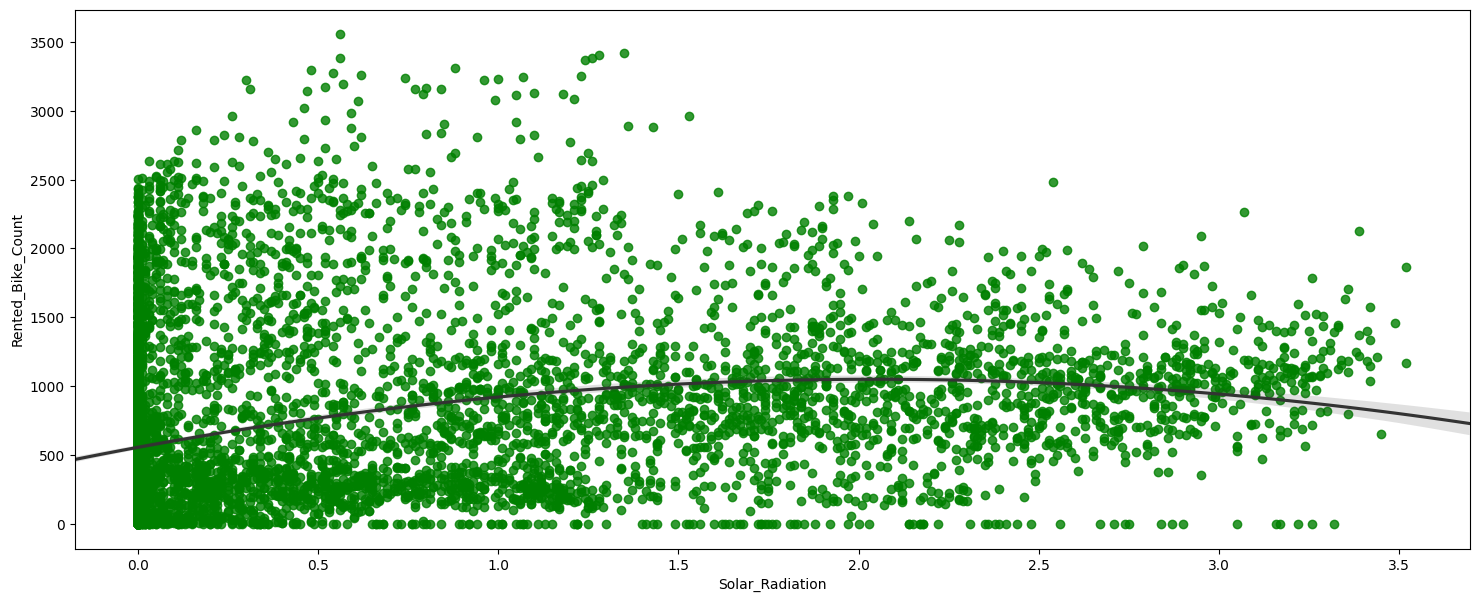

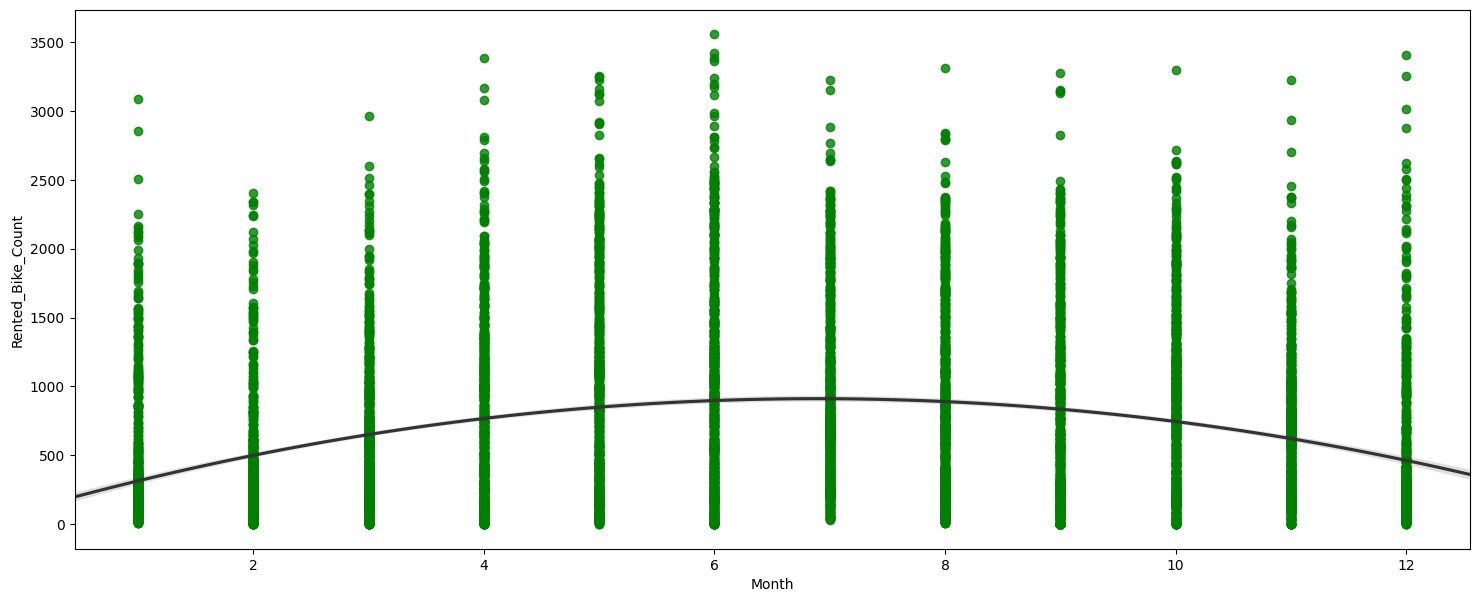

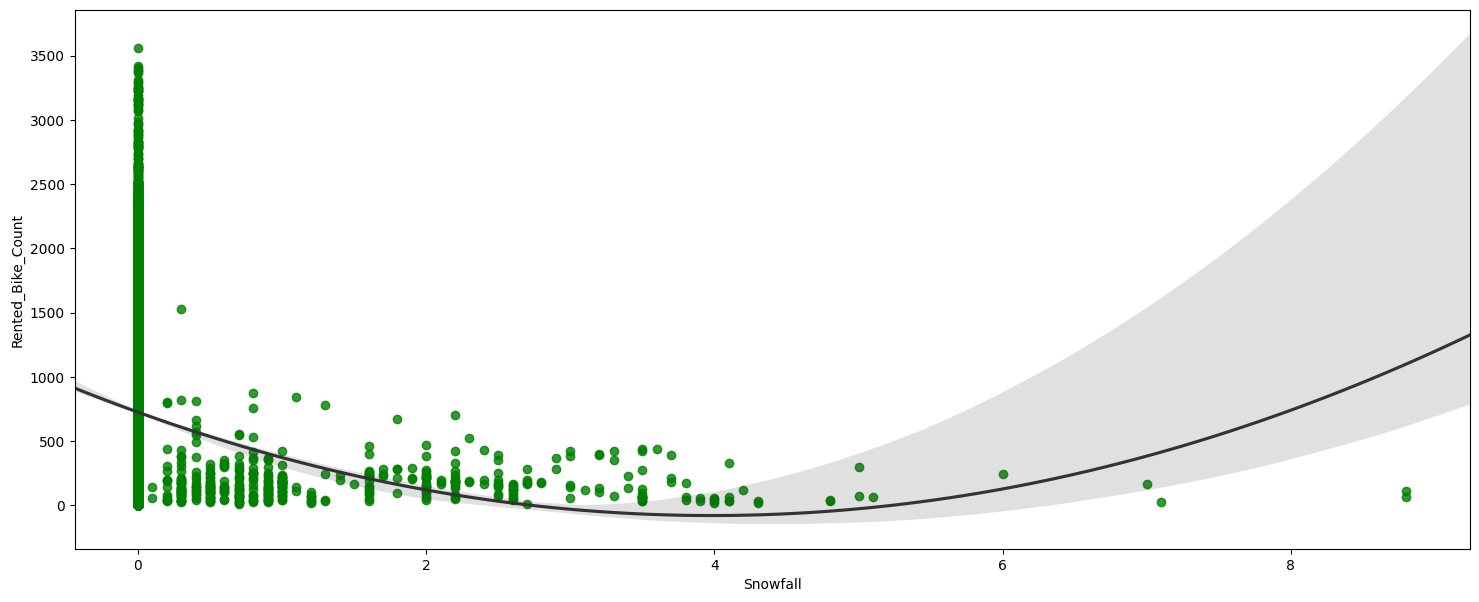

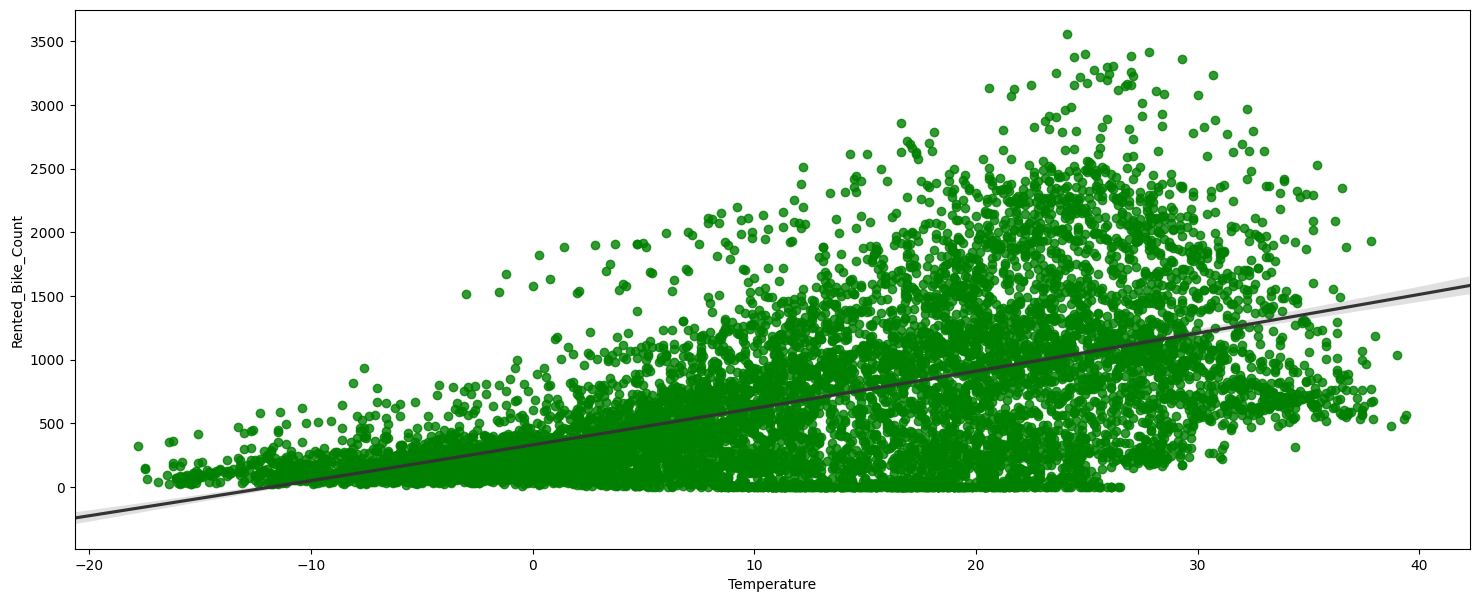

In [ ]:
 #lets check the linear relationship between the dependent variable -'rented_bike_count'and remaining columns (independent variables)
for i in numerical_data :
  if i not in ['Rented_Bike_Count']:
    fig = plt.figure(figsize=(18,7))
    fig=plt.gca()

    sns.regplot(
        data = dataset,x=i,y="Rented_Bike_Count",
        truncate = False,order= 2,color=".2",scatter_kws={'color':'green'}
    )

    plt.show()


1. Why did you pick the specific chart?

I used regplot as it allows us to quickly visualize the relationship between two variables and determine whether there is a linear or non-linear relationship between them.

2. What is/are the insight(s) found from the chart?

- Hour:

1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

3) We can say that from morning 7 AM to Evening 7 PM we have good Bike Rent Count, and from 7 PM to 7 AM Bike Rent count starts declining.

Temperature:

1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.

2) But for normal temperature the Bike rent count is very high.

humidity

1) Here its seems like humidity is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

Wind Speed:

1) upto wind speed 4 m/s there is good bike rent count.

Visibility:

1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

Dew Point Temperature:

1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

Solar radiation:

: 1)Here the amount of rented bikes is huge, when there is solar radiation.

Rainfall And snowfall:

1) Its very obivious that people usually do not like ride bikes in rain and snowfall.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how the variables impact the number of rented bikes, we can make strategies accordingly

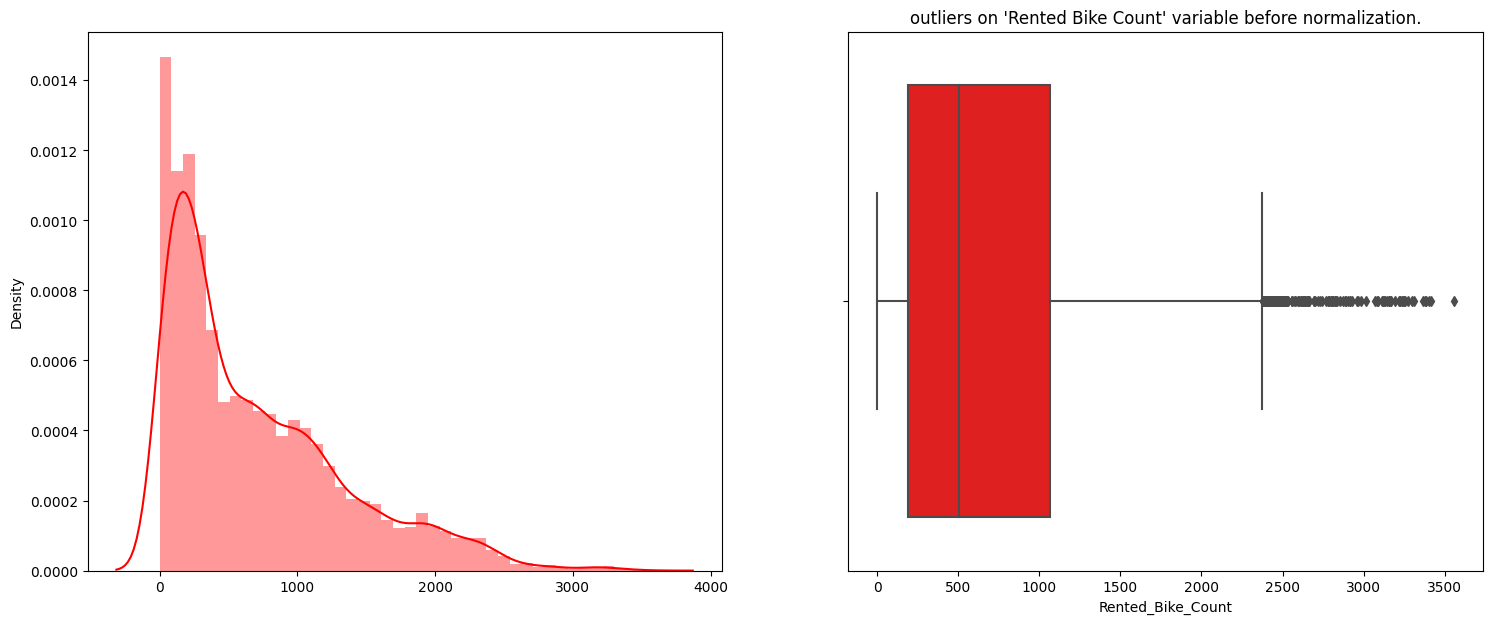

In [ ]:
#Visualization of data distribution on the dependent variable using distplot and boxplot charts .
f, axes = plt.subplots(1, 2, figsize=(18,7))

sns.distplot(x=(dataset['Rented_Bike_Count']),color='r',ax=axes[0])

sns.boxplot(x=(dataset['Rented_Bike_Count']),color='r',ax=axes[1])
plt.title("outliers on 'Rented Bike Count' variable before normalization.")

plt.show()

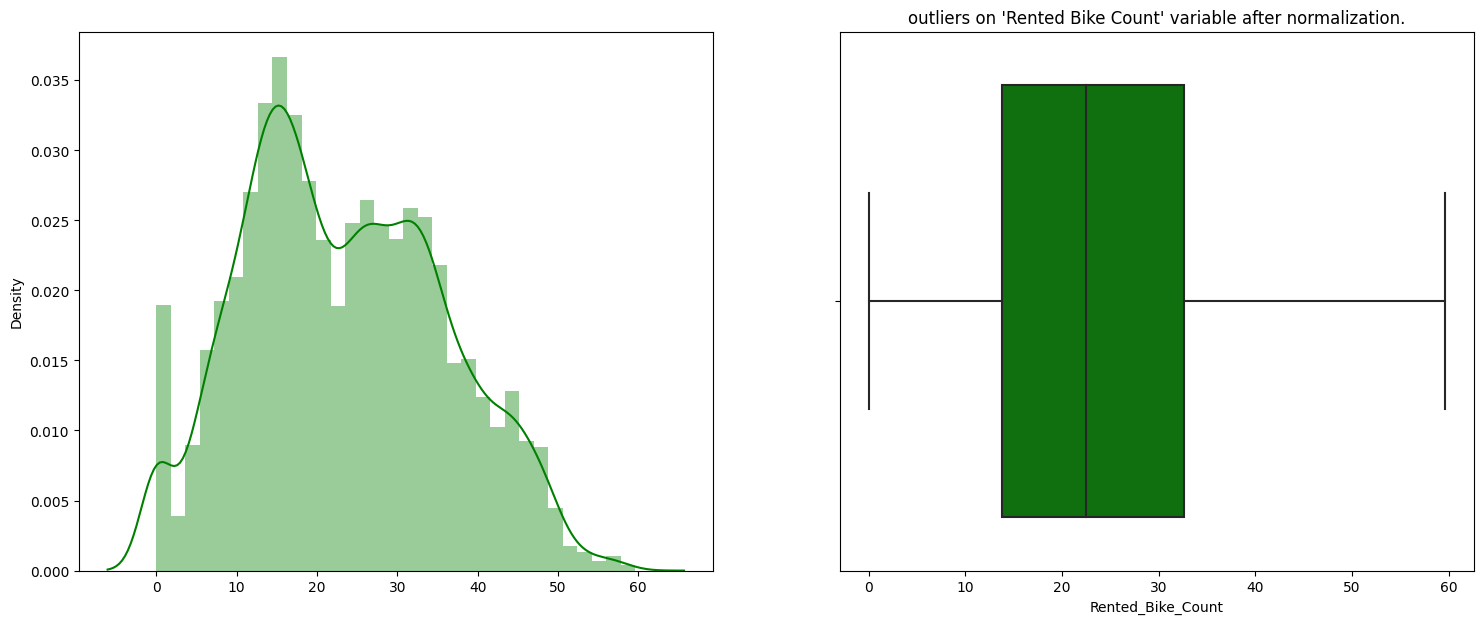

In [ ]:
#normalizing data using sqrt method
f, axes = plt.subplots(1, 2, figsize=(18,7))

sns.distplot(x=np.sqrt(dataset['Rented_Bike_Count']),color='g',ax=axes[0])

sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']),color='g',ax=axes[1])
plt.title("outliers on 'Rented Bike Count' variable after normalization.")

plt.show()

1. Why did you pick the specific chart?

Used distplot to visualize the distribution of data and using boxplot to detect outliers.

2. What is/are the insight(s) found from the chart?

As we can see from both the charts the distribution of the data is less skewed and is moving towards normally distributed data The outliers are also gone after normalization.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance

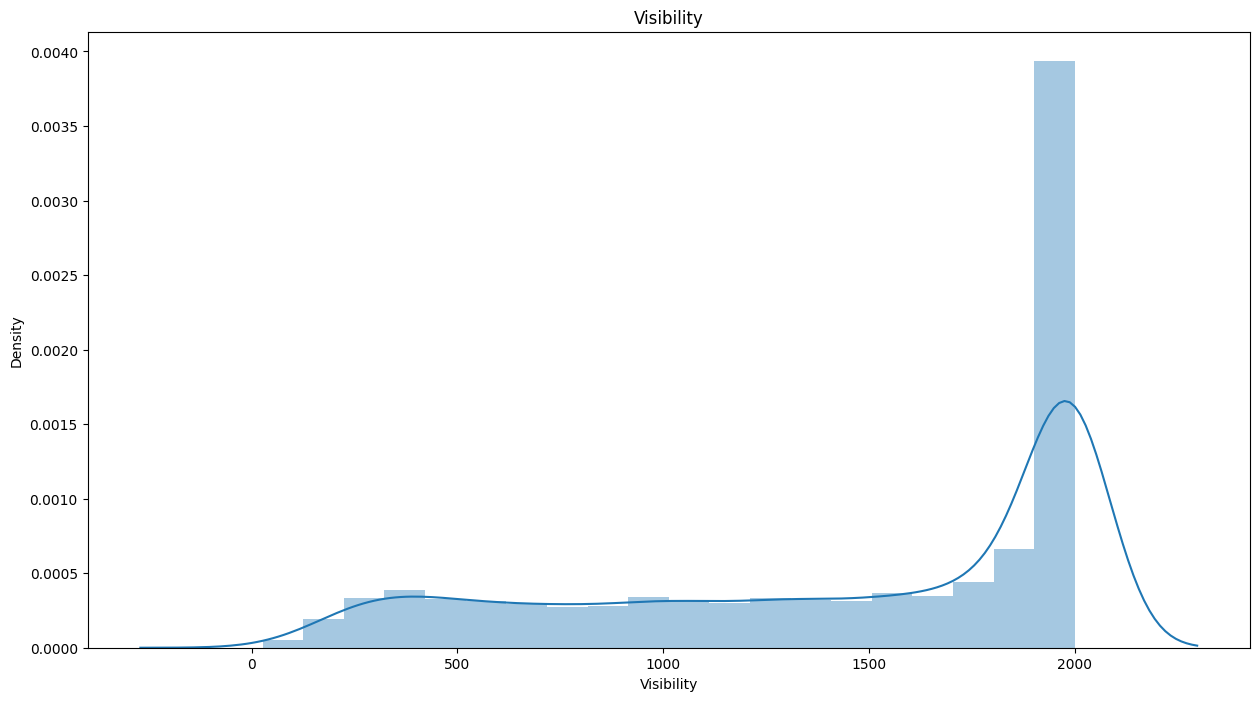

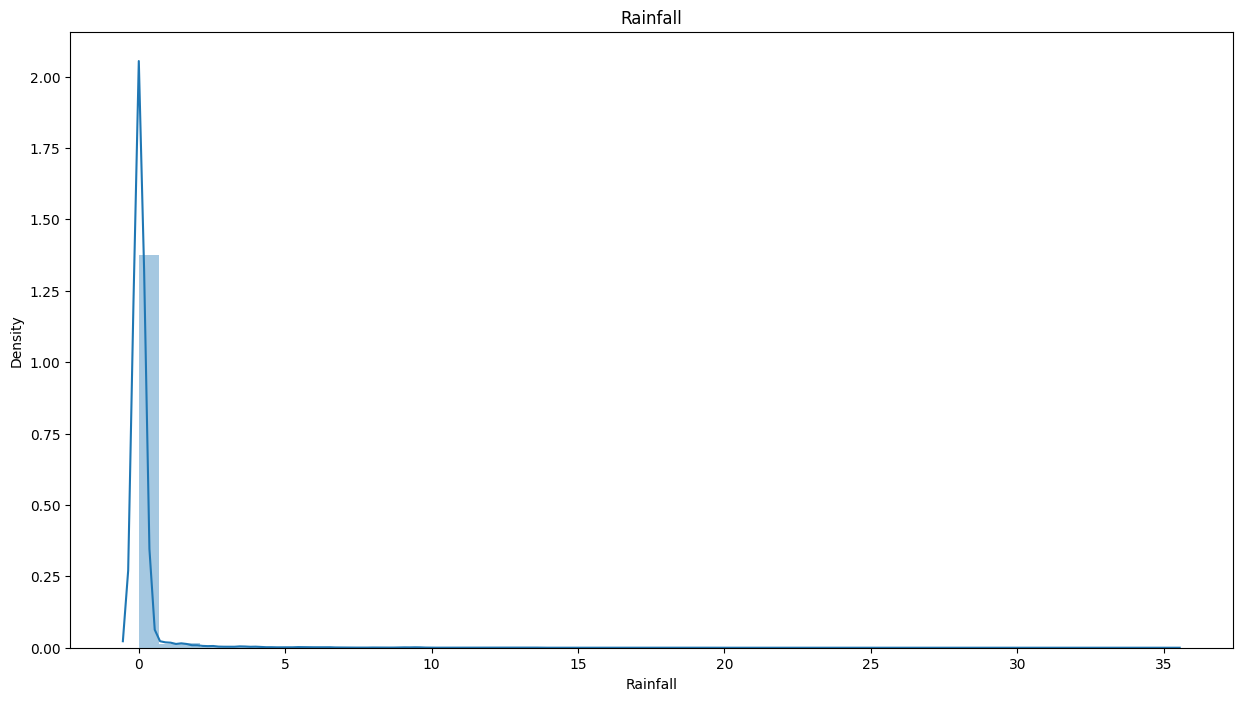

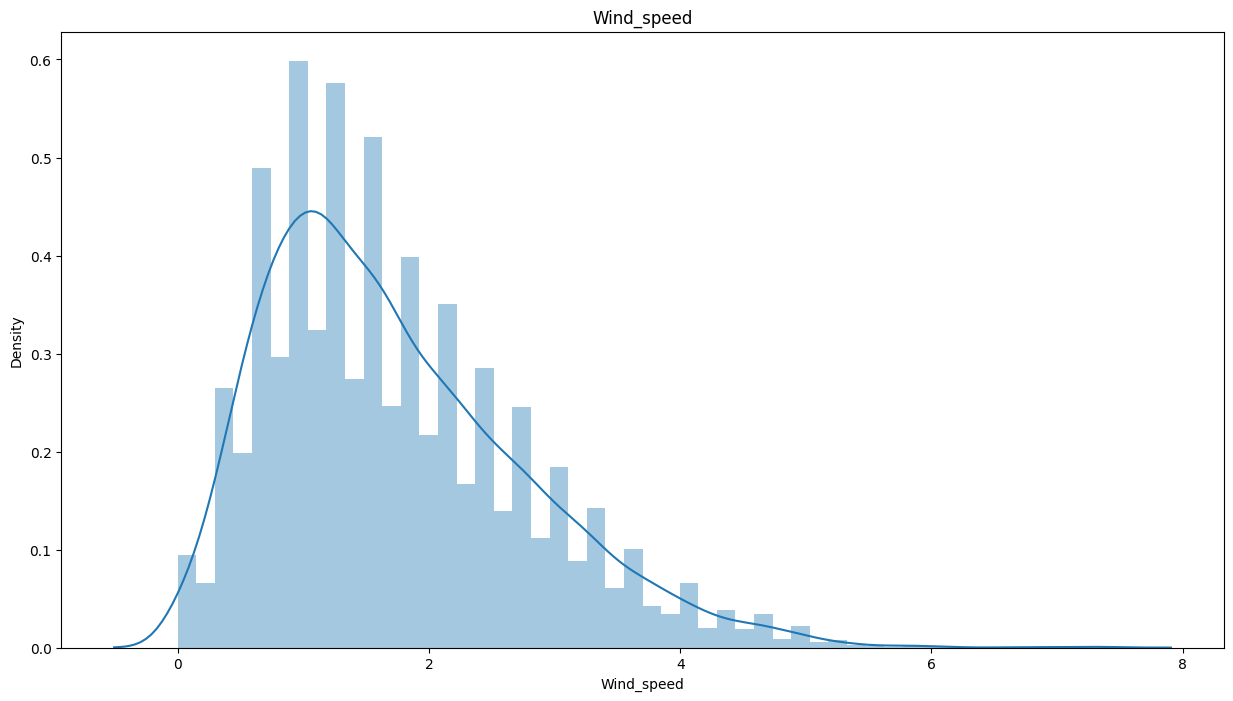

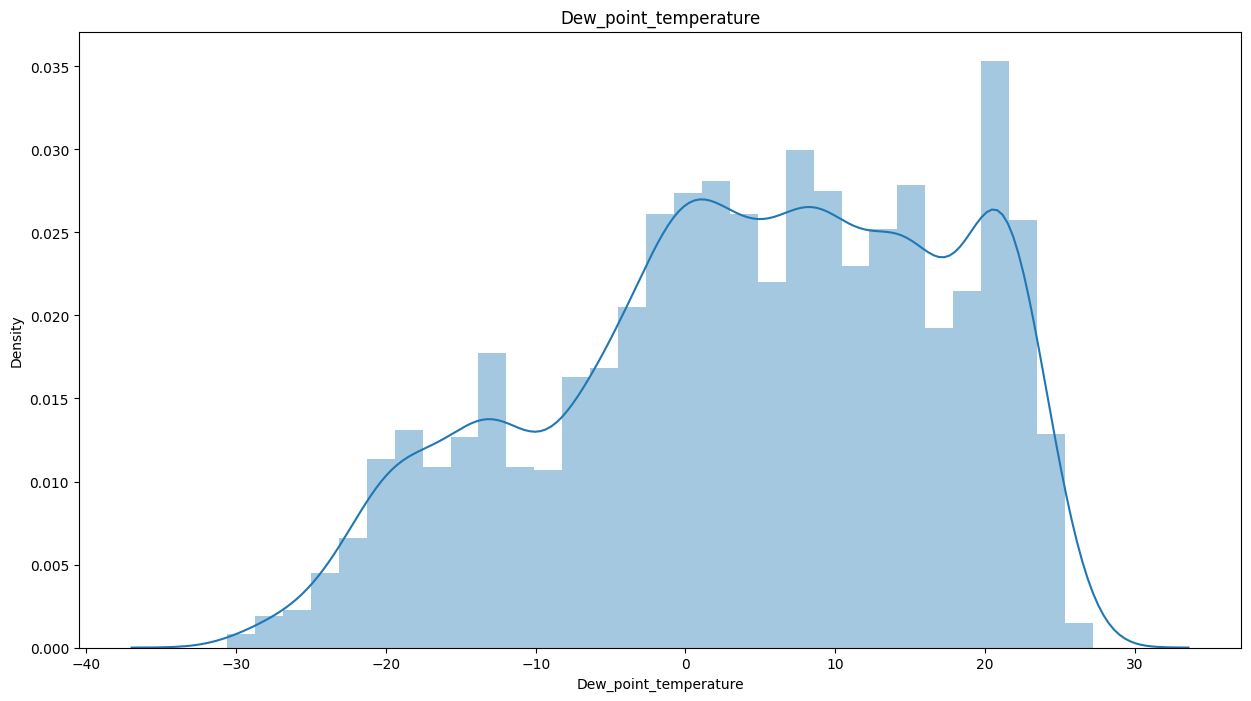

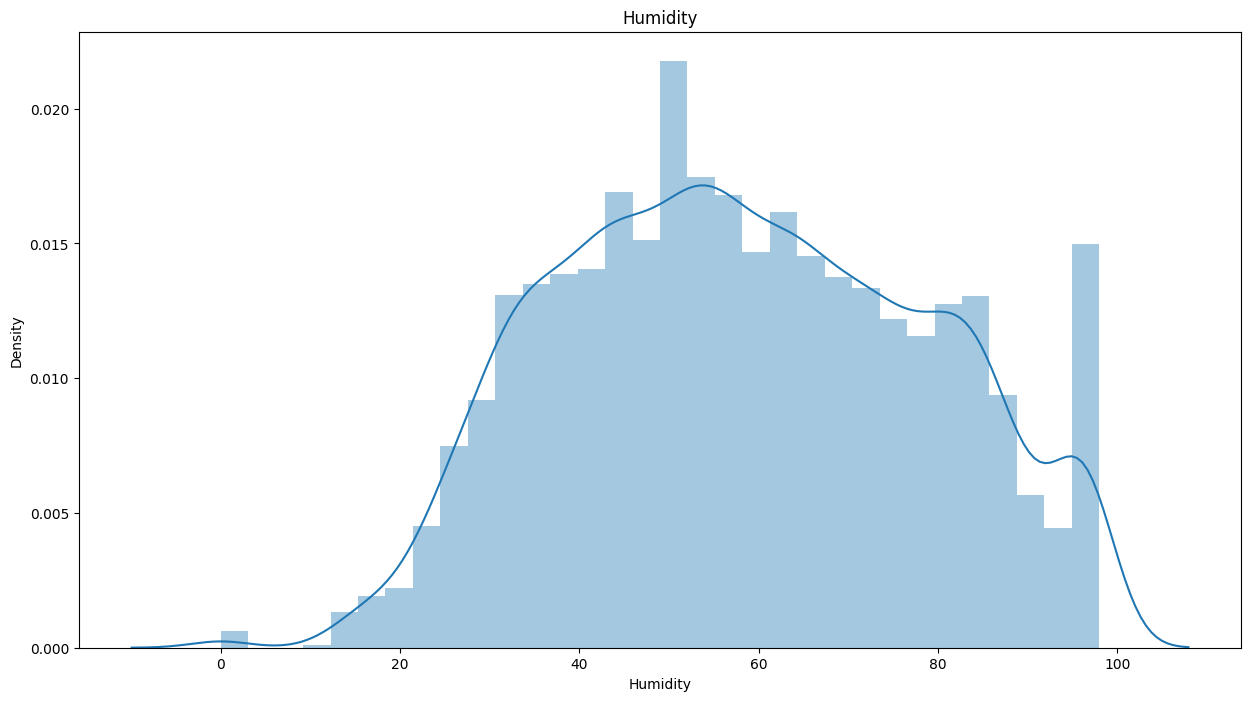

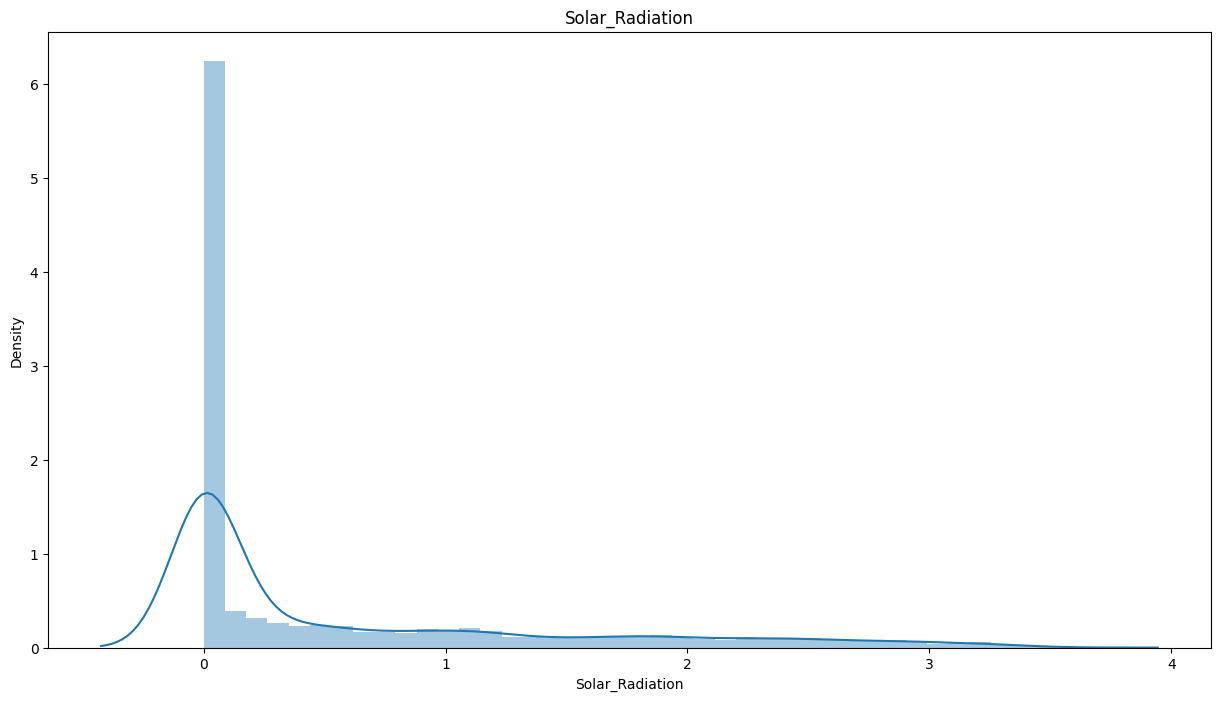

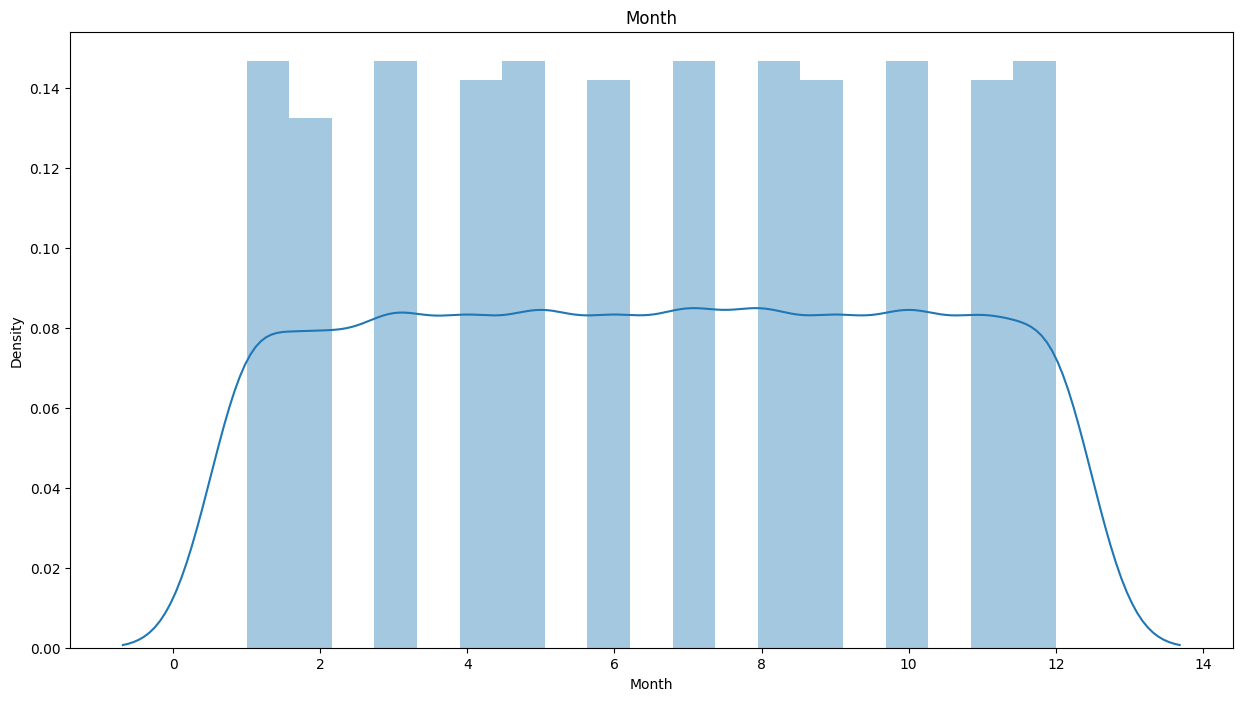

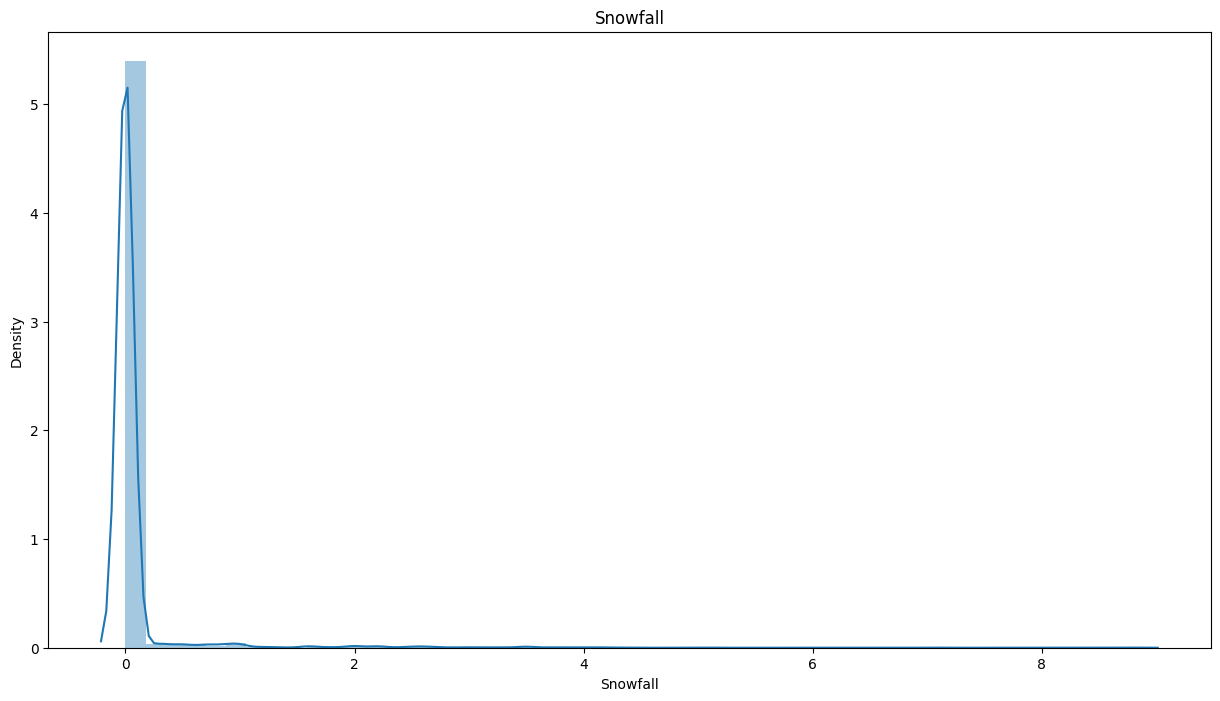

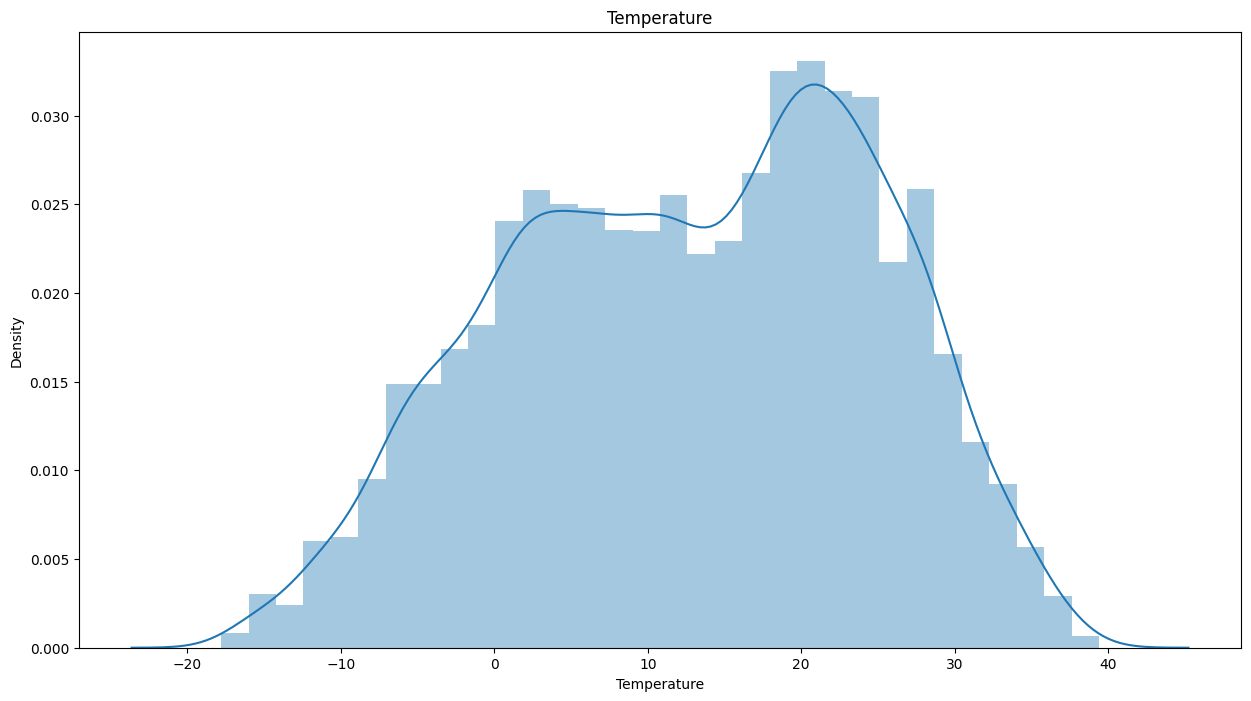

In [ ]:
#visualization of data for all the numerical variables using distplot
for i in numerical_data:
  if i not in ['Rented_Bike_Count']:
    plt.figure(figsize=(15,8))
    plt.title(i)
    sns.distplot(dataset[i])
    plt.show()

1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

2. What is/are the insight(s) found from the chart?

Solar radiation, Snowfall, Rainfall and visibility are highly skewed.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

We can see that weather influences the output in a big way as the data for Solar radiation, Snowfall, Rainfall and visibility are highly skewed we can say that people choose riding a bike on specific weather conditions.

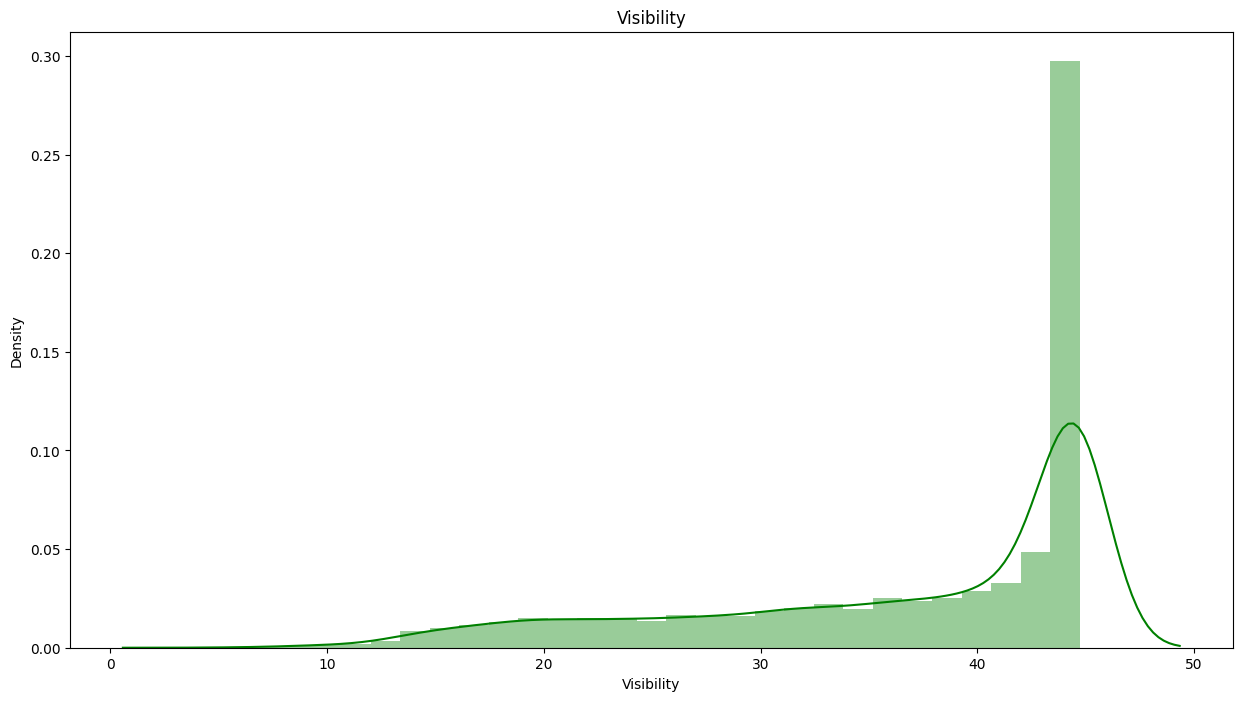

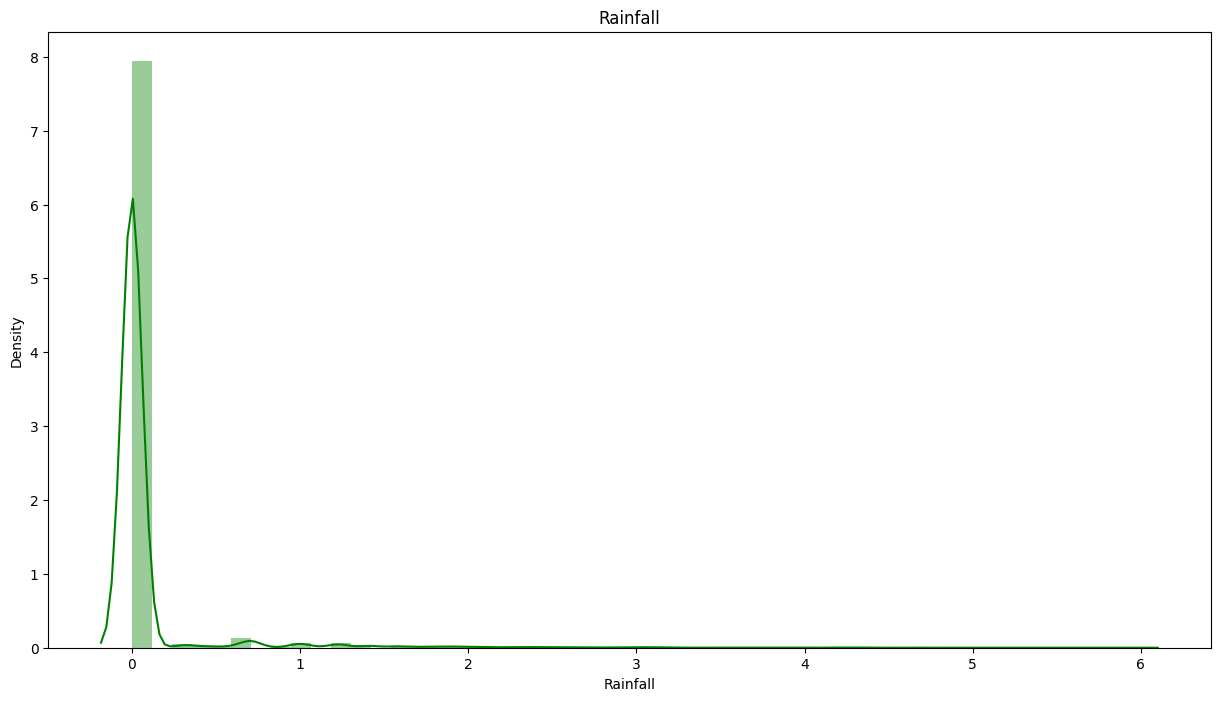

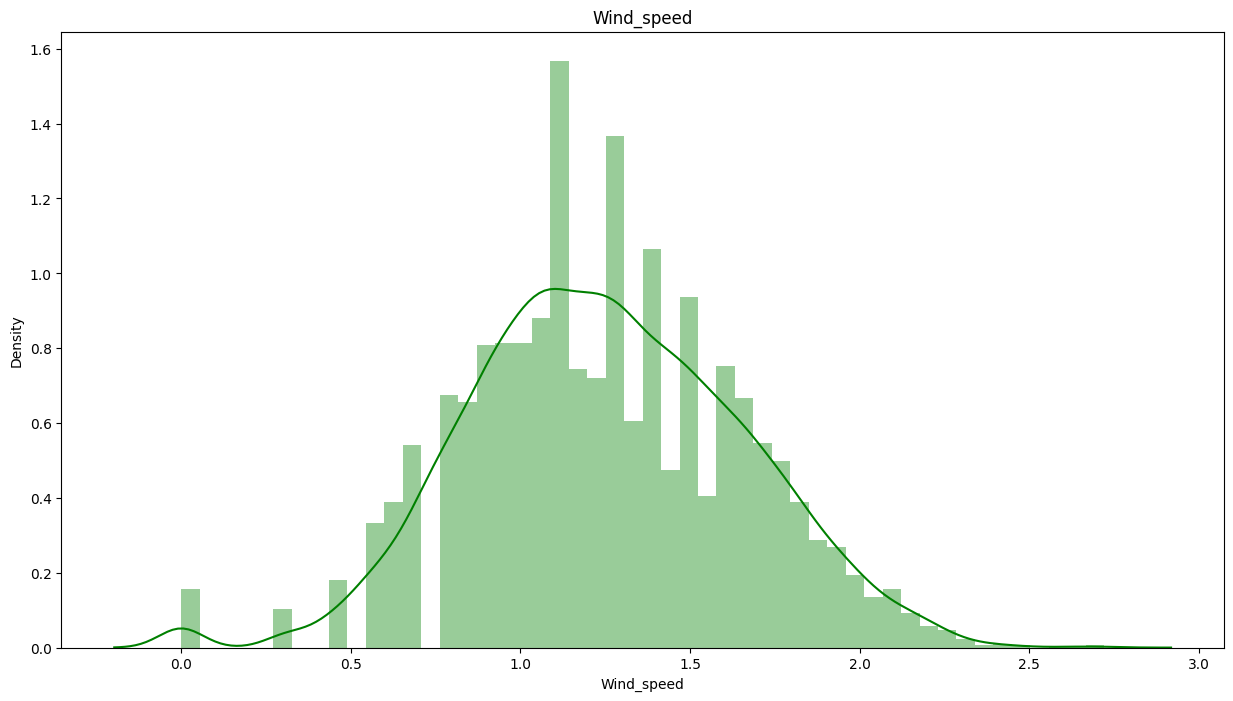

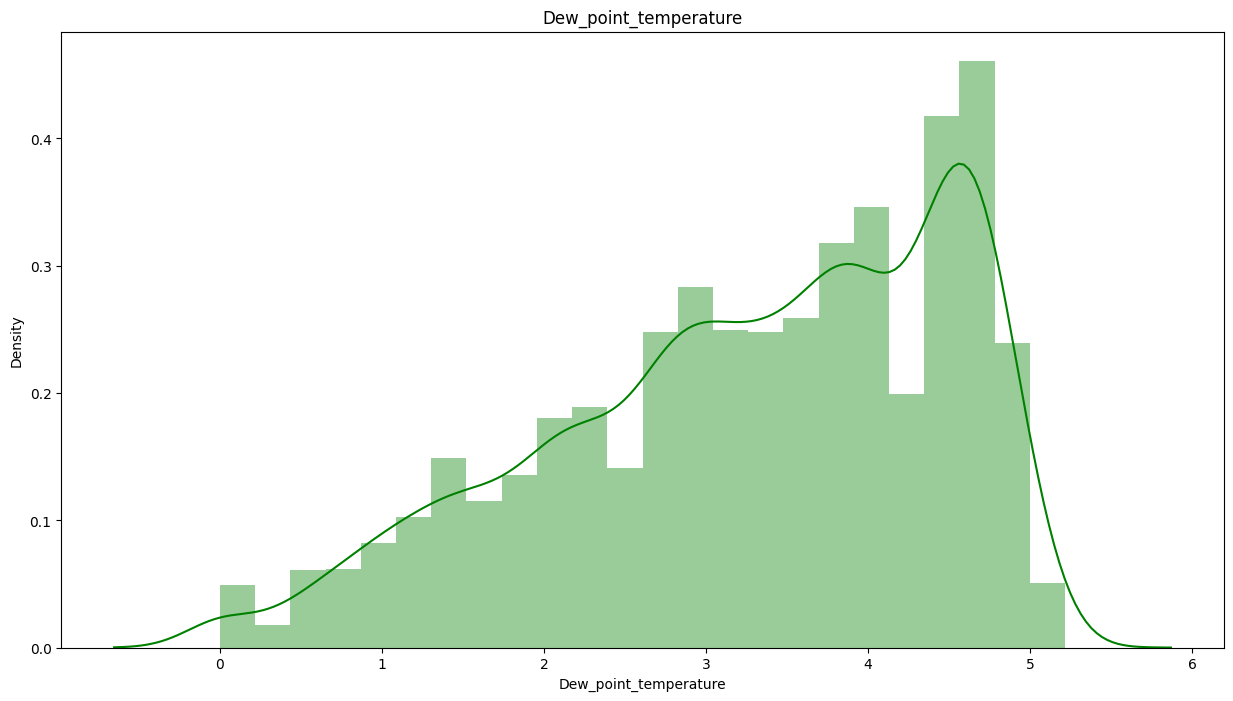

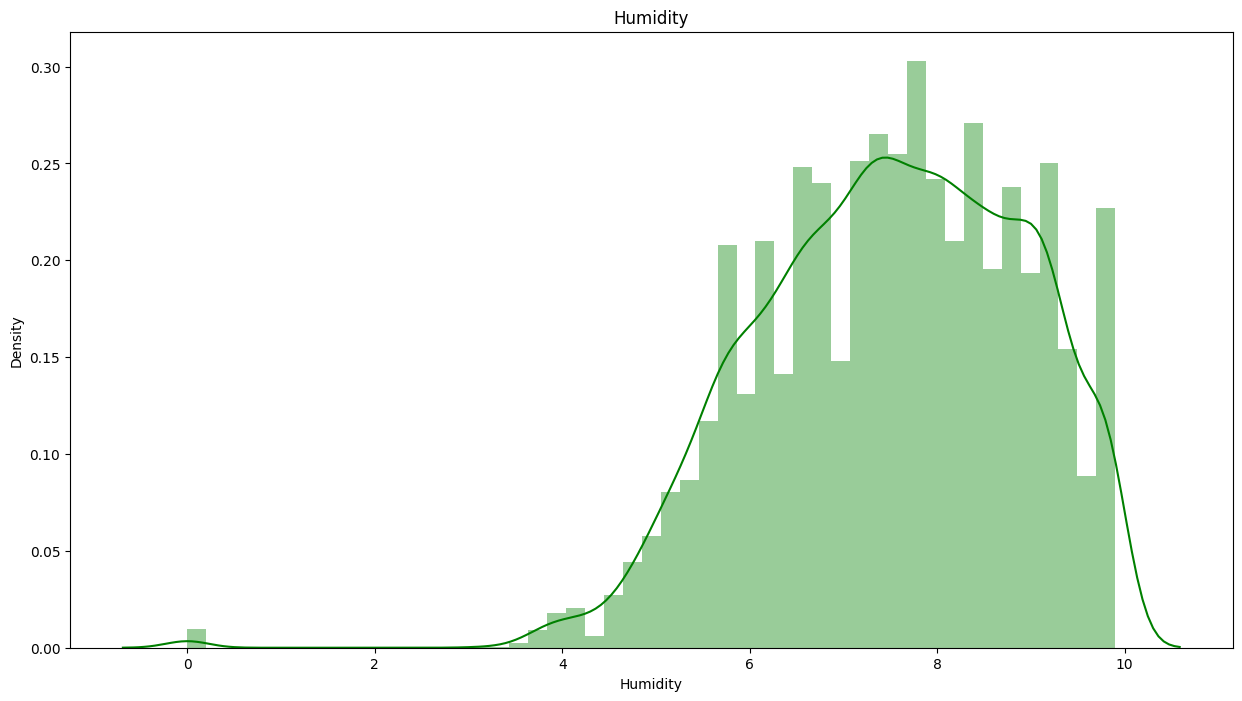

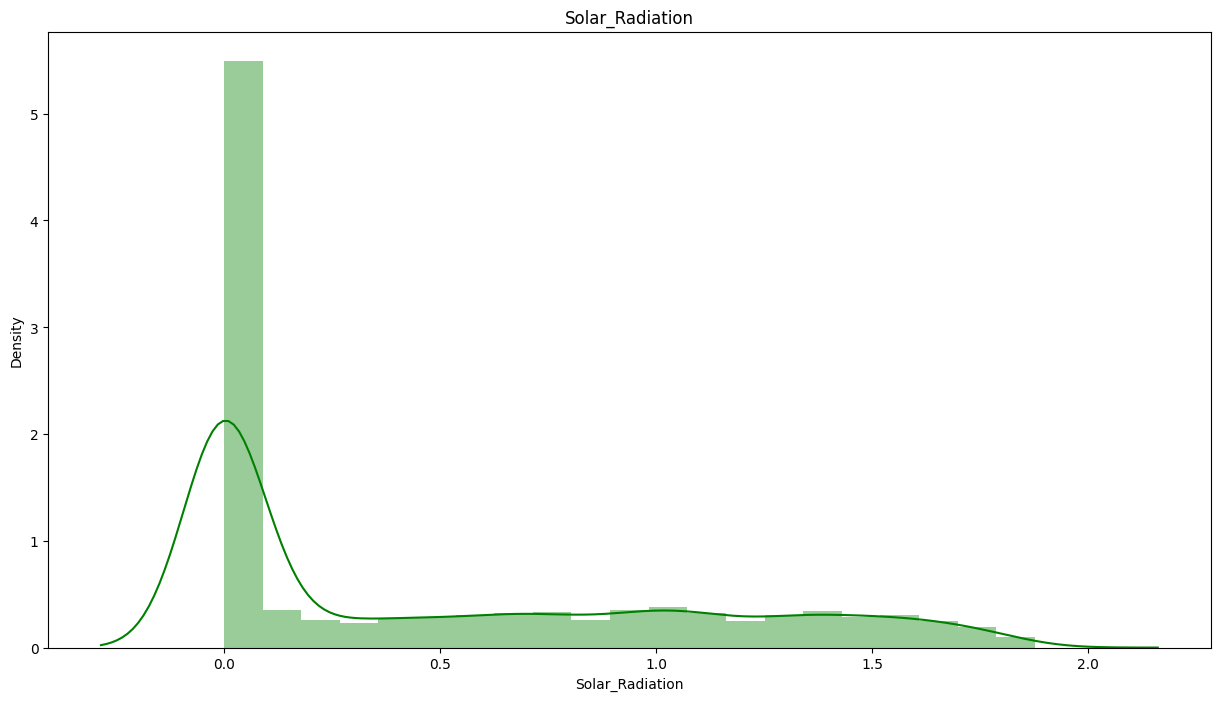

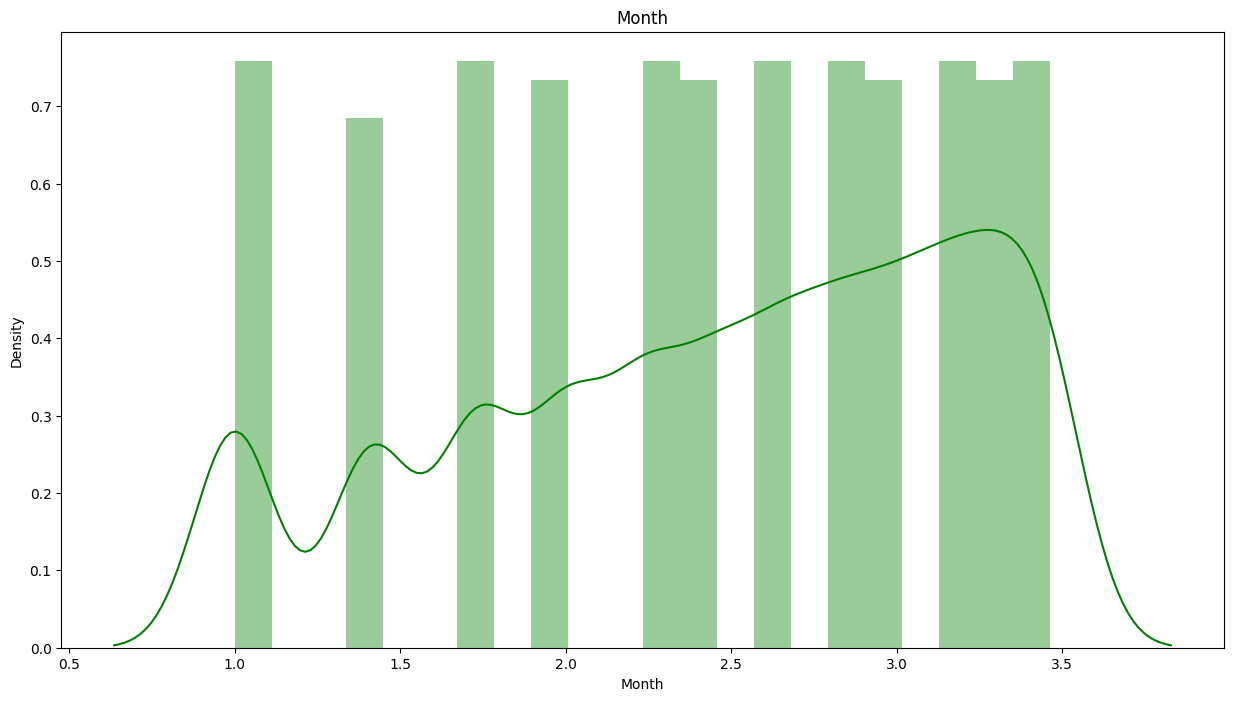

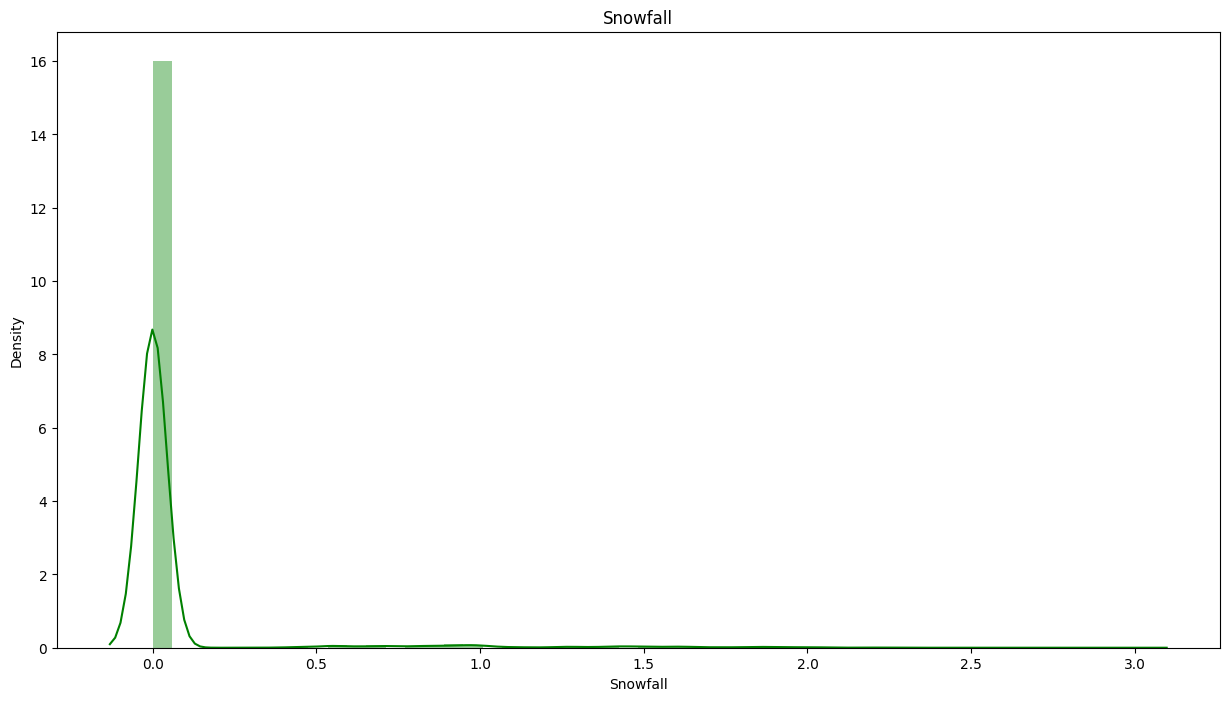

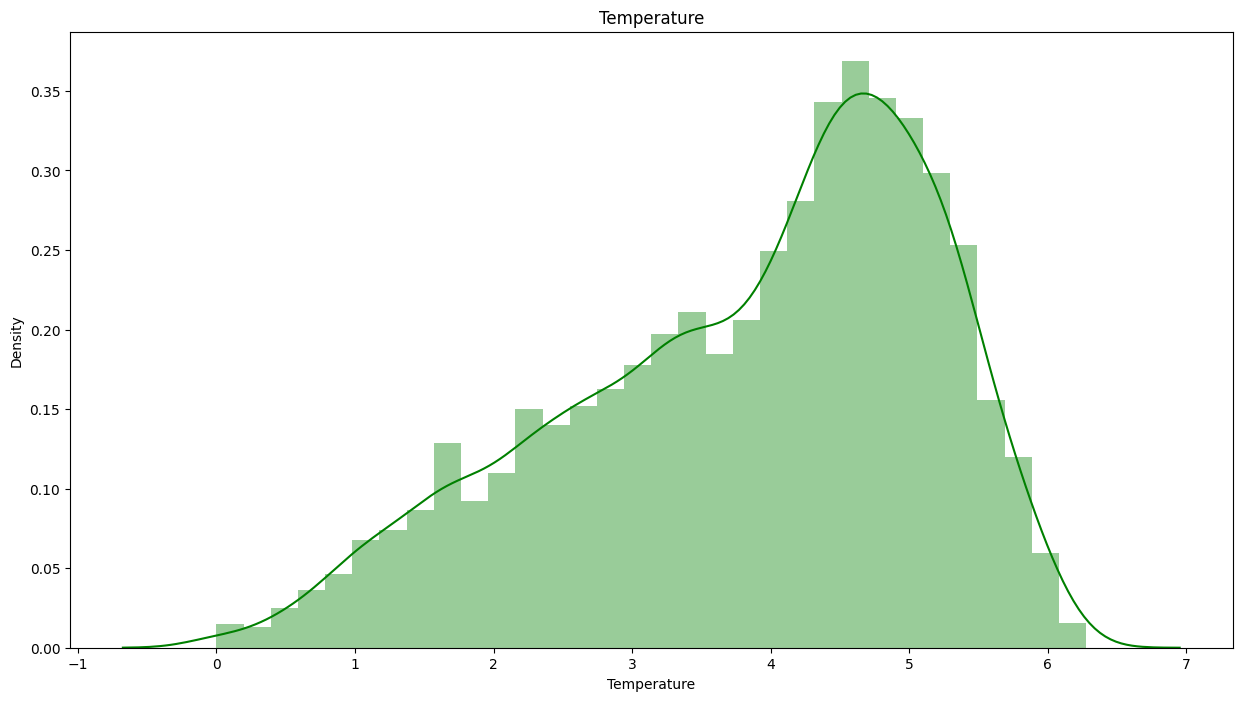

In [ ]:
#visualizing the numerical after square root normalization
for i in numerical_data:
  if i not in ['Rented_Bike_Count']:
    plt.figure(figsize=(15,8))
    plt.title(i)
    sns.distplot(np.sqrt(dataset[i]),color='g')
    plt.show()

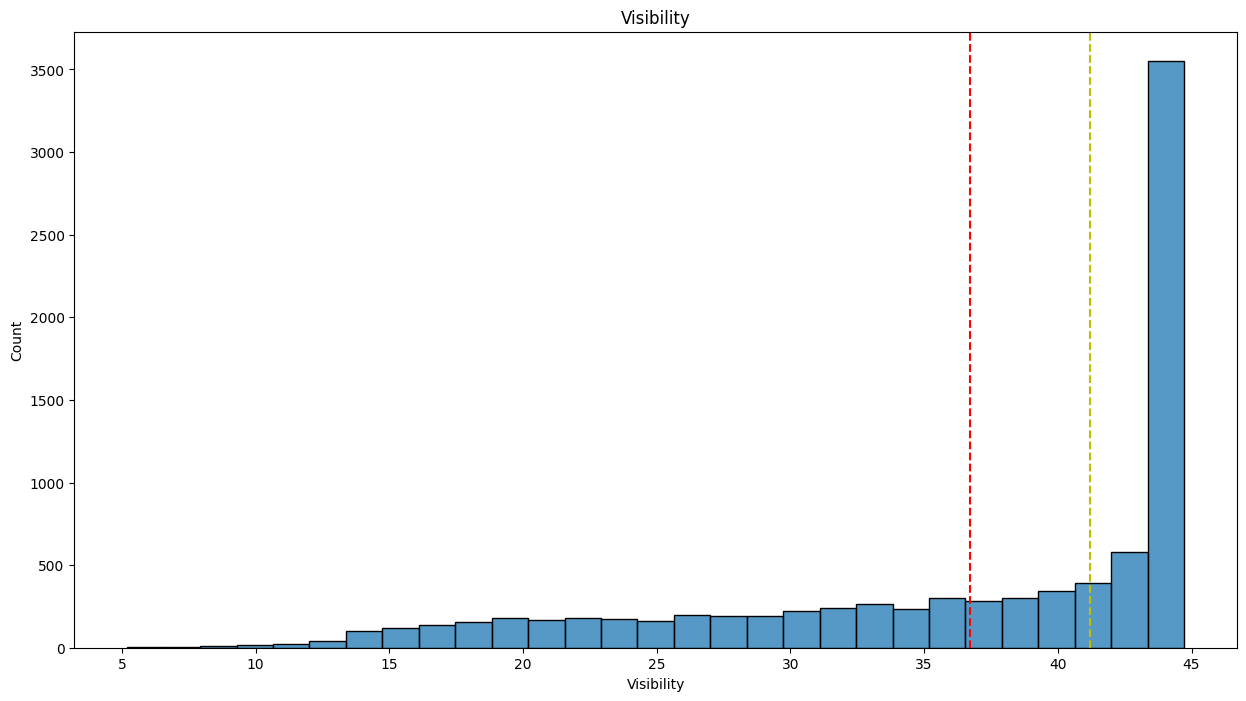

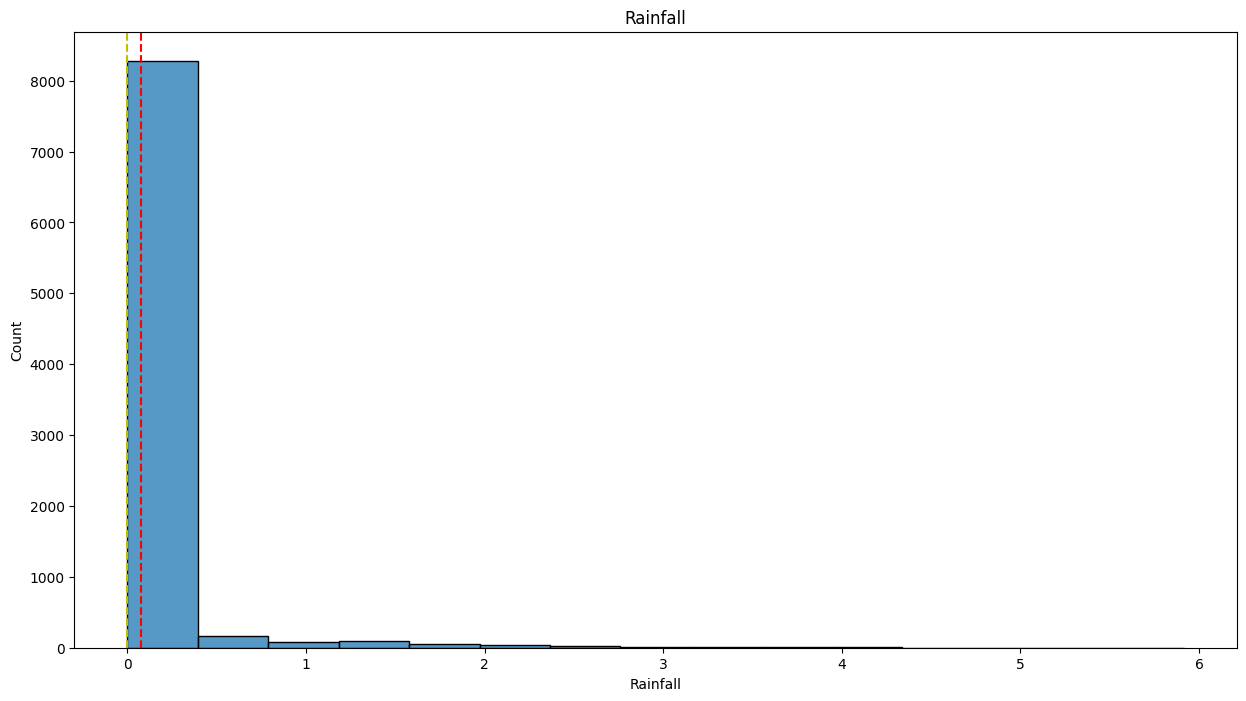

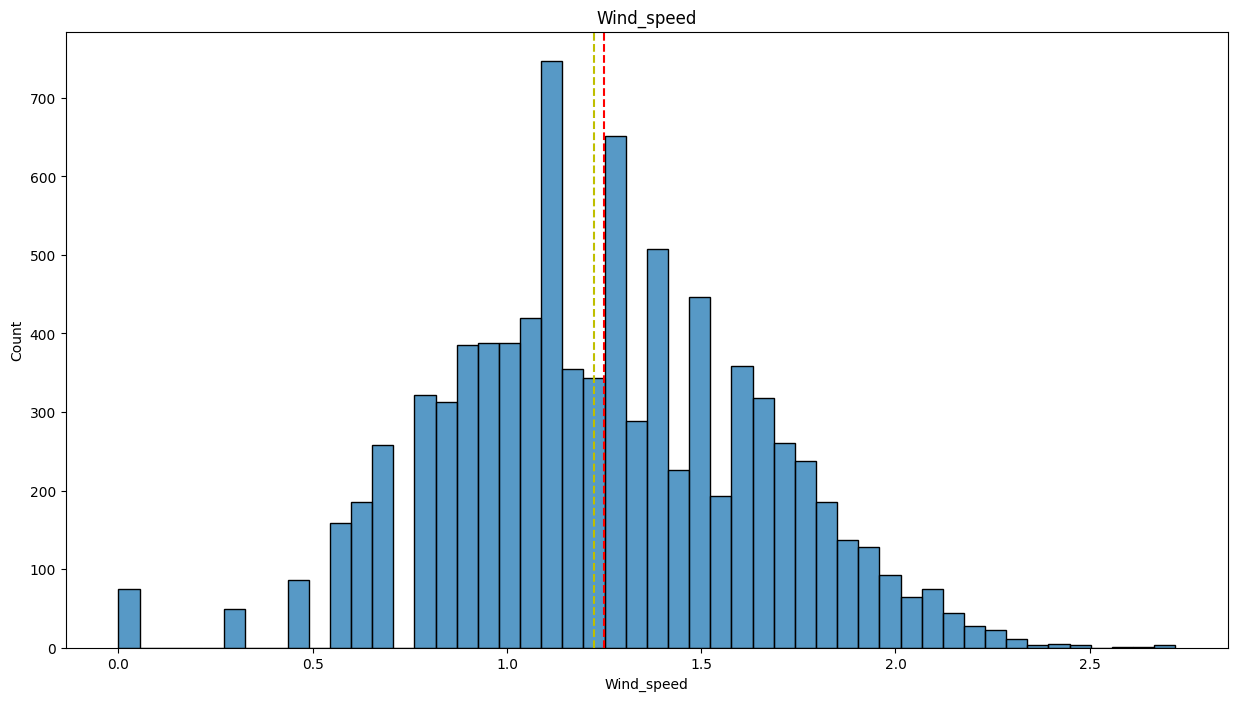

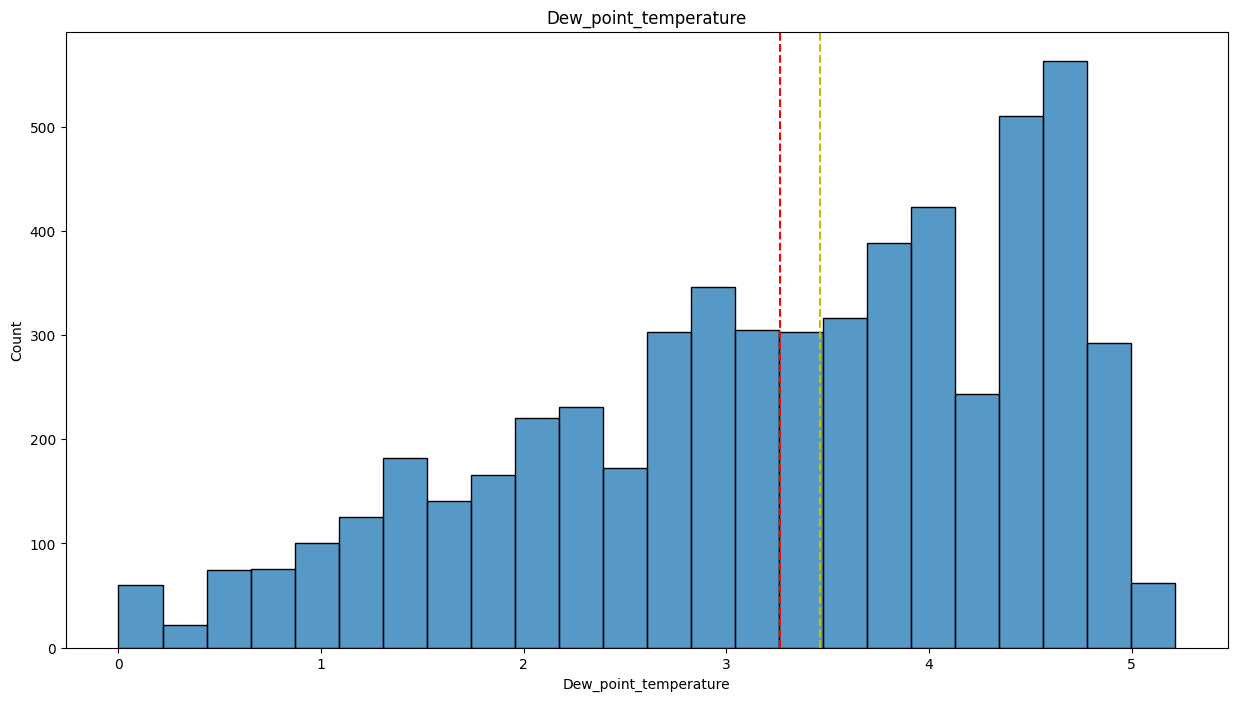

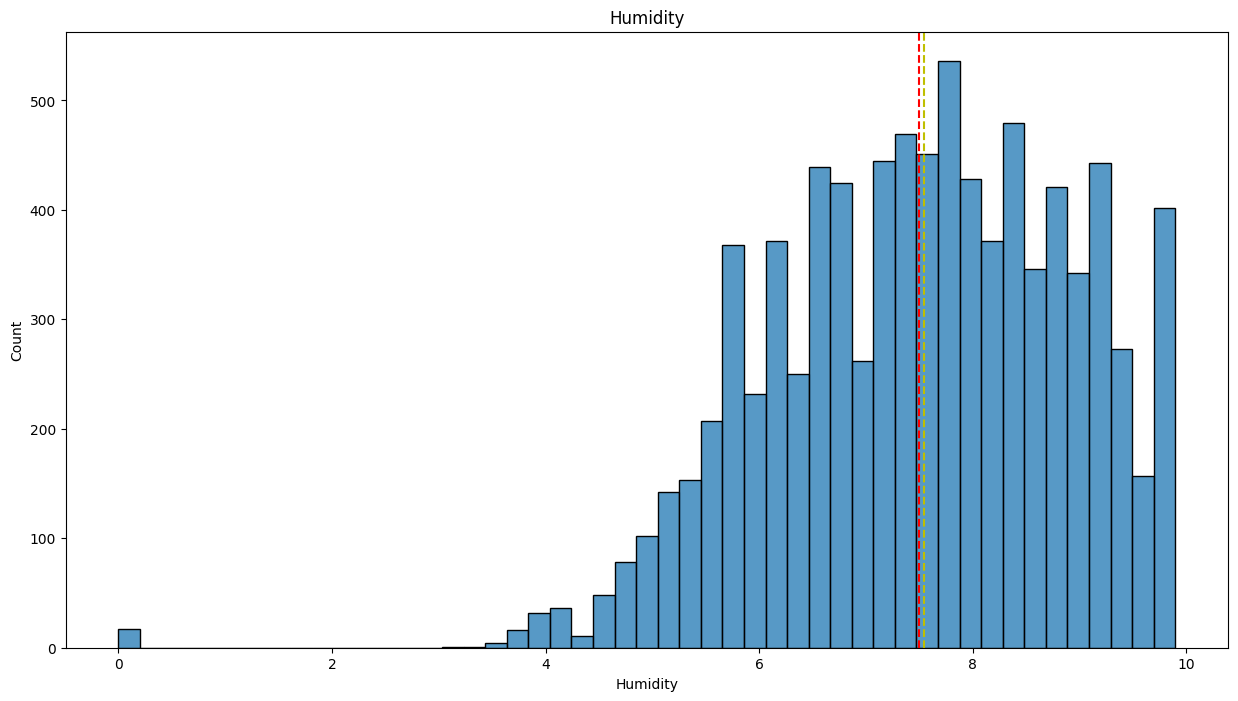

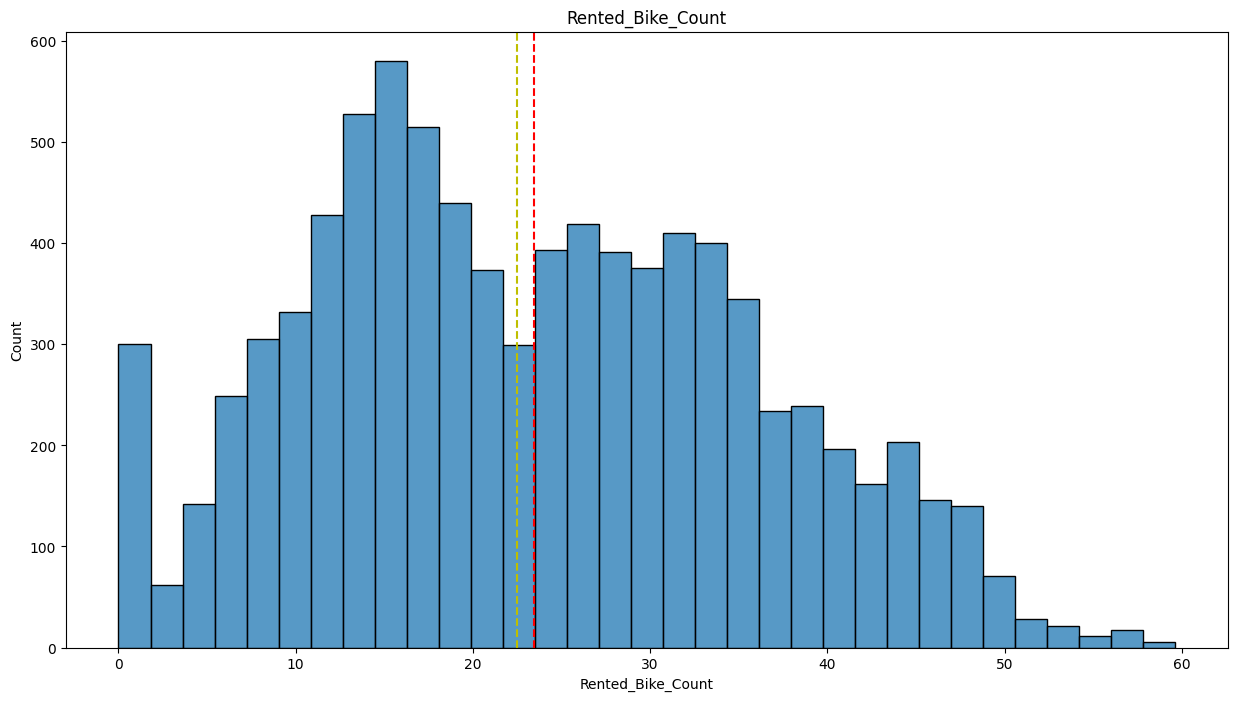

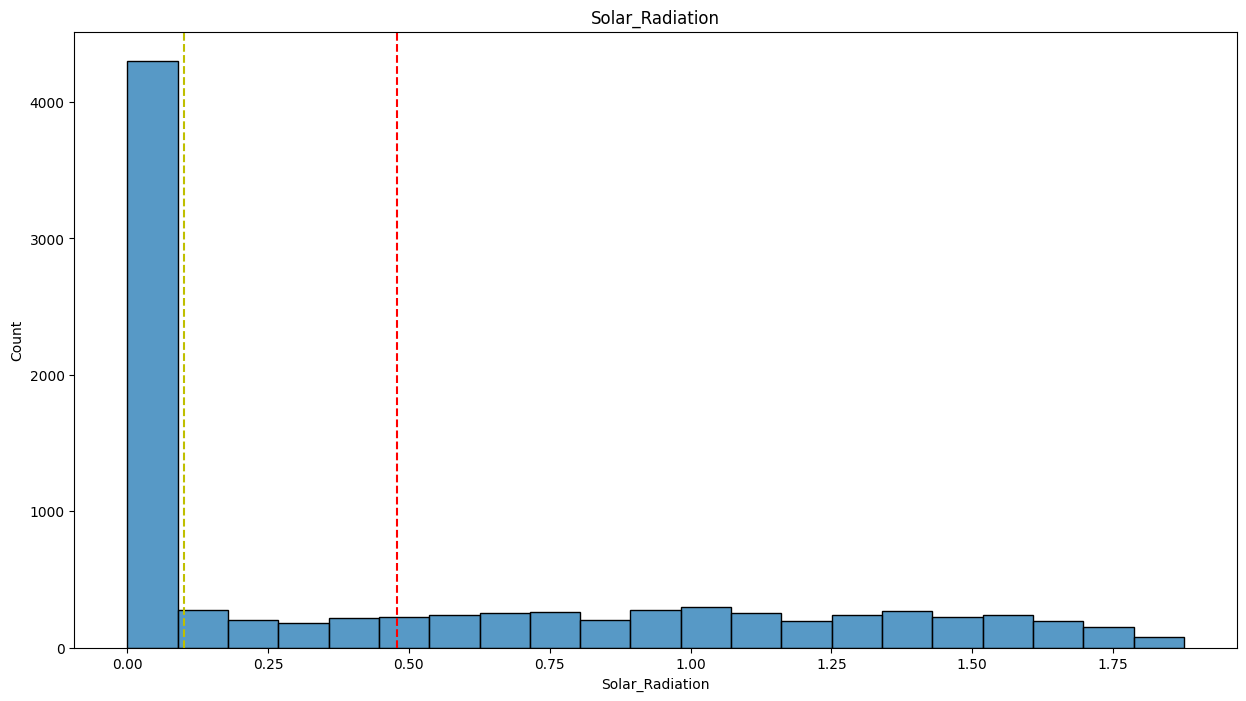

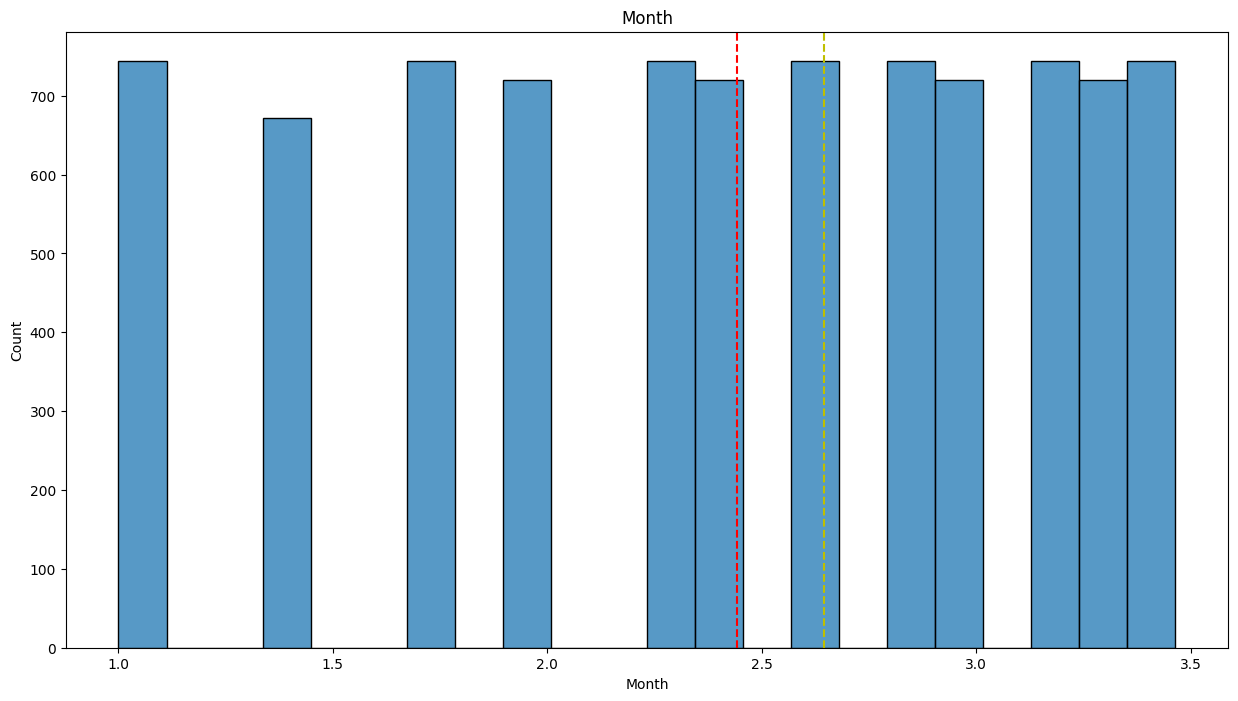

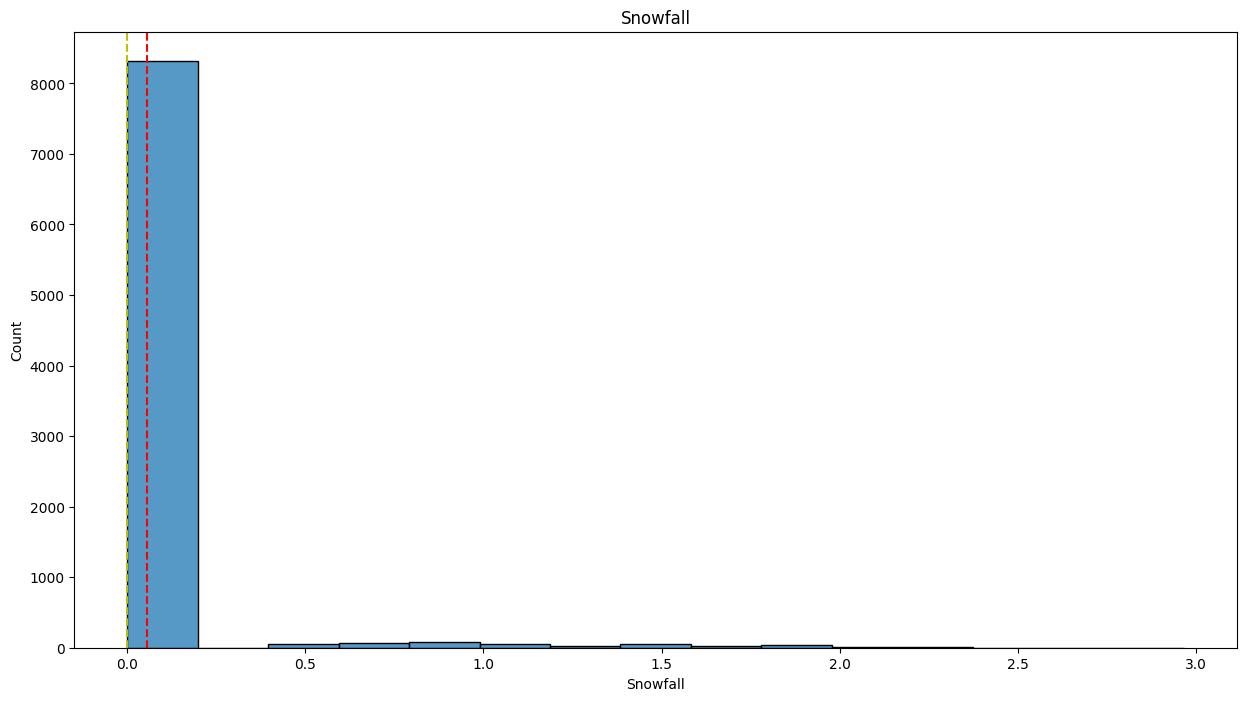

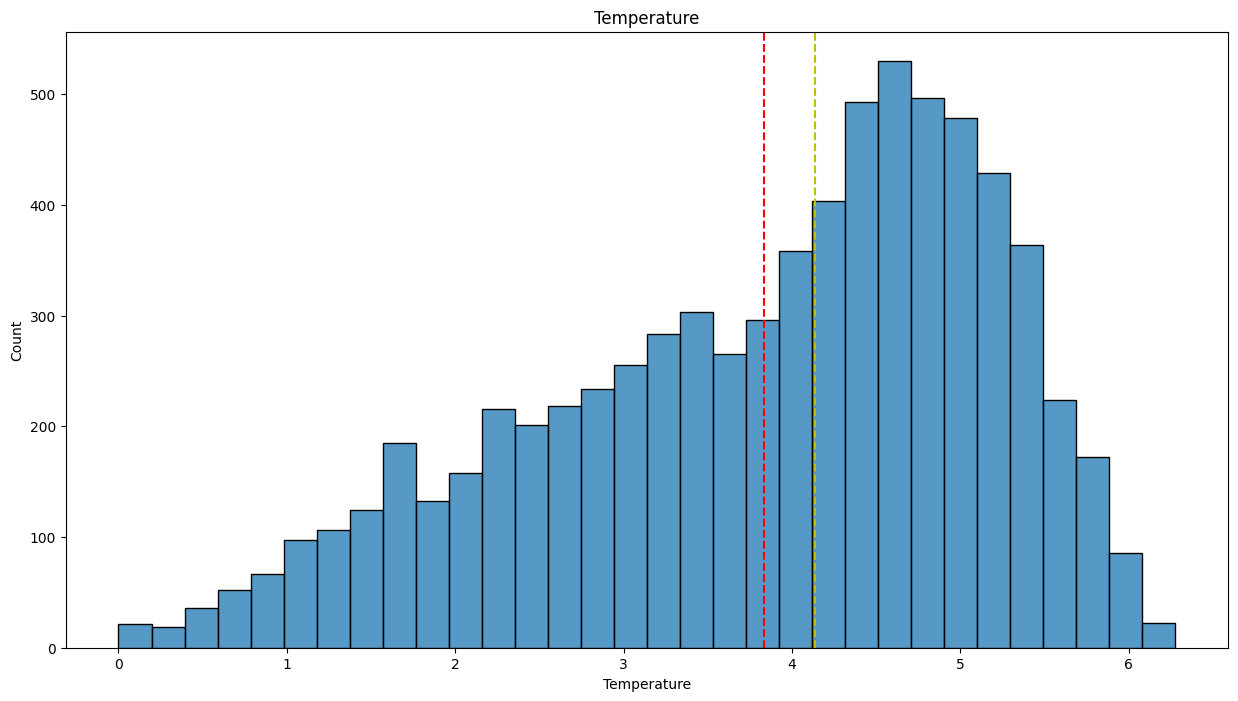

In [ ]:
#visualization the distribution of numerical data with mean and median histplot

for i in numerical_data:
  fig = plt.figure(figsize=(15,8))
  sns.histplot(np.sqrt(dataset[i]))
  plt.axvline(np.sqrt(dataset[i]).mean(),linestyle='--',color = 'r')
  plt.axvline(np.sqrt(dataset[i]).median(),linestyle='--',color = 'y')
  plt.title(i)
  plt.show()

1. Why did you pick the specific chart?

Histplot is one of the best charts to show the data distribution.

2. What is/are the insight(s) found from the chart?

Solar radiation, Snowfall, Rainfall and visibility are still skewed but Distribution of Wind speed, Dew point temperature, Temperature and Humidity has improved.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.

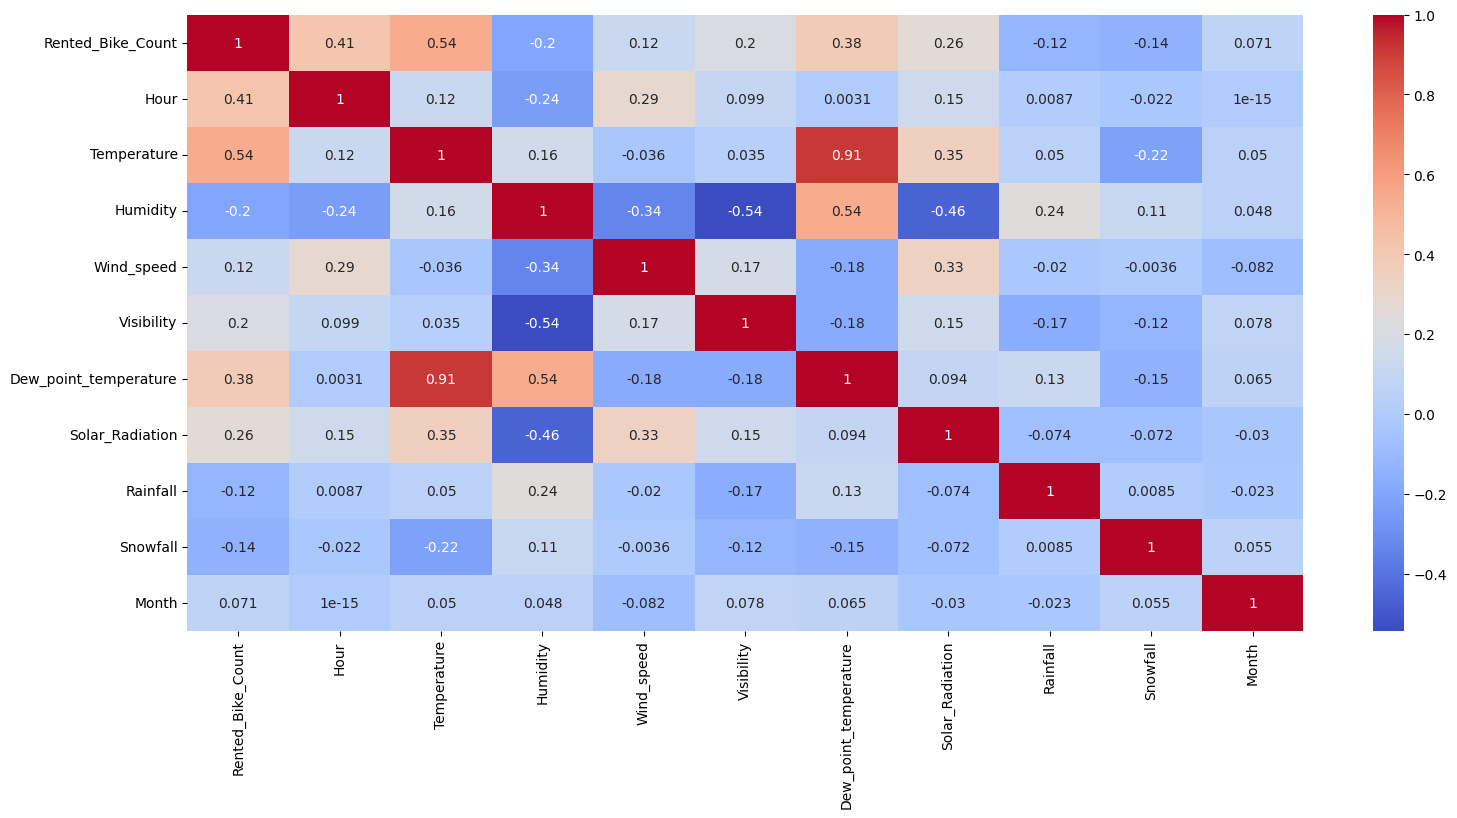

In [ ]:
 #correlation between dependent and independent variable using correlation heatmap visualization.
 corr = dataset.corr()
 plt.figure(figsize=(18,8))
 sns.heatmap(corr,annot=True , cmap='coolwarm')
 plt.show()


1. Why did you pick the specific chart?

I used correlation heatmap to visualize the correlation among variables.

2. What is/are the insight(s) found from the chart?

Temperature and Dew point Temperature are highly correlated. As per our regression assumption, there should not be colinearity between Independent variables. We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

In [ ]:
#Feature engineering and data preprocessing
#handling missing values

dataset.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
dtype: int64

In [ ]:
# we will drop humidity , dew point temperature , visibility because these columns from our dataset shown collinearity in VIF test



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Day                    8760 non-null   object 
dtypes: f

In [ ]:
#feature selection - selecting the features which are not collinear among themselves and whose vif is less than 5

features = list(set(dataset.describe().columns)-set(['Rented_Bike_Count','Dew_point_temperature','Humidity','Visibility']))
features

['Rainfall',
 'Wind_speed',
 'Solar_Radiation',
 'Month',
 'Hour',
 'Snowfall',
 'Temperature']

What all feature selection methods have you used and why?

Used VIF(Variance Inflation Factor). It is a measure of multicollinearity in regression analysis that quantifies how much the variance of the estimated regression coefficients are increased due to the linear dependence between the predictor variables. And along with that we did manual feature elimination using VIF.

Which all features you found important and why?

I have selected these features as they show least amount of multicolinearity-

[Snowfall , "Wind speed . 'Solar Radiation , 'Rented Bike Count", "Temperature, 'Hour, Rainfall ', 'month']

In [ ]:
#Categorical encoding
dataset['Holiday']=dataset['Holiday'].apply(lambda x:1 if x=='Holiday' else 0)

dataset['Functioning_Day']=dataset['Functioning_Day'].apply(lambda x:1 if x=='Yes' else 0 )

dataset['weekend']=dataset['Day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)
dataset= pd.get_dummies(dataset,columns=['Seasons','Hour'])

In [ ]:
features= list(set(dataset.describe().columns)-set(['Dew_point_temperature','Humidity','Visibility']))
features

['Hour_4',
 'Hour_10',
 'Hour_23',
 'Hour_16',
 'Hour_20',
 'Hour_21',
 'Seasons_Autumn',
 'Seasons_Summer',
 'Holiday',
 'Hour_3',
 'Wind_speed',
 'Hour_15',
 'Hour_12',
 'Hour_6',
 'Hour_1',
 'Hour_7',
 'Hour_9',
 'Snowfall',
 'Rainfall',
 'Hour_2',
 'Rented_Bike_Count',
 'Hour_8',
 'Month',
 'Hour_22',
 'Hour_13',
 'Functioning_Day',
 'Seasons_Spring',
 'Hour_11',
 'Seasons_Winter',
 'Hour_18',
 'Temperature',
 'Hour_5',
 'Solar_Radiation',
 'Hour_14',
 'Hour_17',
 'weekend',
 'Hour_0',
 'Hour_19']

What all categorical encoding techniques have you used & why did you use those techniques?

I used manual categorical encoding and One hot encoding which is a technique used in data preprocessing and feature engineering represent categorical variables as numerical features that can be used as inputs to machine learning models

In [ ]:
#Data splitting
x= dataset[list(set(features)-{'Rented_Bike_Count'})]
#using sqroot on dependent variable to normalize the variable

y = np.sqrt(dataset['Rented_Bike_Count'])

# splitting data, 70 % for training and 30 % for testing using train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.30 , random_state = 0 )


In [ ]:
#data scaling
scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Ml model implementation
def calc_scores(true,pred):
  MAE=mean_absolute_error(true,pred)
  print(f"The mean absolute error (MAE) is {MAE}")

  MSE = mean_squared_error(true,pred)
  print(f"the mean squared error (MSE) is {MSE}")

  RMSE = np.sqrt(MSE)
  print(f"the root mean squared error (RMSE) is {RMSE}")


  R2= r2_score(true,pred)
  print(f"The R2 score is {R2}")

In [ ]:
#defining a function which appends all the model scores in a dataframe modelwise

# making an empty dataframe

score_df=pd.DataFrame({'Model':[],'Mean Absolute Error(MSE)':[],'The root mean squared error(RMSE)':[],'R2 score':[]})

def store_scores(Model,MAE,MSE,RMSE,R2):
  scores={'Model':Model,'Mean Absolute Error(MSE)':MAE,'The root mean squared error(RMSE)':RMSE,'R2 score':R2}
  global score_df
  score_df= score_df.append(scores,ignore_index=True)
  return score_df

In [ ]:
#defining a function for visualizing feature importance bar graph

def feature_imp(model):
  model1=[model]

  best_rf=model.best_estimator_
  feature_importances = best_rf.features_importances_

  feature_importance_df=pd.DataFrame({'Feature':x.columns, 'Importance':feature_importances})

  feature_importance_df=feature_importance_df.sort_values('Impotance',ascending=False)

  sns.set_style("whitegrid")
  plt.figure(figsize=(15,8))
  sns.barplot(x='Importance',y='Feature',data = feature_importance_df, color='blue',order=feature_importance_df['Feature'])
  if model1==[model]:
    plt.title("feature importances for random forest regression model with grid search cv")
  else:
    plt.title("feature importances for gradient boosting regression model with grid search cv")
  plt.xlabel('importance')
  plt.ylabel('feature')
  plt.show()


MODEL 1 - LINEAR REGRESSION


In [ ]:
lin_reg=LinearRegression()

reg=lin_reg.fit(x_train,y_train)
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

print(f'coeff - {reg.coef_}')
print(f'intercept- {reg.intercept_}')



coeff - [ 2.59168896e+13  2.60658994e+13  2.55144854e+13  2.66520609e+13
  2.55651951e+13  2.69394404e+13 -1.10017316e+14 -1.09993539e+14
 -2.53740295e-01  2.63609225e+13 -1.85160564e-02  2.65554385e+13
  2.58669935e+13  2.60658994e+13  2.64583939e+13  2.68440574e+13
  2.62630196e+13 -5.30750071e-01 -2.03723133e+00  2.67482657e+13
  2.60163419e+13  3.14027220e-01  2.61646801e+13  2.64097119e+13
  4.88310014e+00 -1.10230378e+14  2.60163419e+13 -1.09246117e+14
  2.56157865e+13  4.30344924e+00  2.57668579e+13  2.94830993e+00
  2.65069693e+13  2.64097119e+13 -4.95117188e-01  2.62139047e+13
  2.67002152e+13]
intercept- 23.585335952465943


In [ ]:
#checking model train and test score :

print(f'linear regression model train score is :{reg.score(x_train,y_train)}')
print(f'linear regression model test score is : {reg.score(x_test,y_test)}')


linear regression model train score is :0.7111906773274781
linear regression model test score is : 0.7271068268780885


In [ ]:
#calculating performance scores

calc_scores(y_test,y_test_pred)

The mean absolute error (MAE) is 4.939002659700058
the mean squared error (MSE) is 41.9158690257331
the root mean squared error (RMSE) is 6.474246599082638
The R2 score is 0.7271068268780885


In [ ]:
store_scores('Linear regression',5.02,43.411,6.588,0.717)

Model  Mean Absolute Error(MSE)  \
0  Linear regression                      5.02   

   The root mean squared error(RMSE)  R2 score  
0                              6.588     0.717

MODEL 2 - Lasso regression

In [ ]:
lasso = Lasso()
lasso.fit(x_train,y_train)

y_pred_trlasso = lasso.predict(x_train)
y_pred_telasso= lasso.predict(x_test)

print(f'coeff {np.array(lasso.coef_)}')
print(f'Intercept {lasso.intercept_}')

coeff [-1.33726932 -0.         -0.          0.          0.18033061  0.208218
  0.20413619  0.         -0.         -0.93355507  0.          0.
 -0.         -0.38695001 -0.          0.          0.         -0.
 -1.32420453 -0.41616434  0.18243467  0.          0.         -0.
  3.67345677 -0.         -0.         -1.24243867  1.20785845  4.64726287
 -1.27792776  0.42007404 -0.          0.19774043 -0.         -0.
  0.5364327 ]
Intercept 23.57934454543813


In [ ]:
calc_scores(y_test,y_pred_telasso)

The mean absolute error (MAE) is 6.083991151519007
the mean squared error (MSE) is 61.12760041041581
the root mean squared error (RMSE) is 7.818414187699179
The R2 score is 0.6020288919433926


In [ ]:
store_scores('lasso regression ',6.82,85.28,9.23,0.444)

Model  Mean Absolute Error(MSE)  \
0  Linear regression                      5.02   
1  lasso regression                       6.82   

   The root mean squared error(RMSE)  R2 score  
0                              6.588     0.717  
1                              9.230     0.444

In [ ]:
#cross validation and hyper parameter tuning
model=Lasso()
params={'alpha':[1e-15,1e-13,1e-10,1e-08,1e-05,0.0001,0.001,0.01,0.1,1,5,10,20,30,40,45,50,55,60,100],}

grid = GridSearchCV(model,params,cv=5)

grid.fit(x_train,y_train)

print("best hyperparamters:{}".format(grid.best_params_))
print("best mean cross_validation score: {:.2f}".format(grid.best_score_))

best hyperparamters:{'alpha': 0.01}
best mean cross_validation score: 0.71


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

y_pred_trlasso=lasso.predict(x_train)
y_pred_telasso=lasso.predict(x_test)

print(f'coeff {np.array(lasso.coef_)}')
print(f'Intercept {lasso.intercept_}')

coeff [-1.94435313e+00 -8.87218672e-01  3.39380303e-01  1.67474223e-01
  1.48633850e+00  1.52356201e+00  1.37492505e+00  2.44865505e-02
 -6.58063239e-01 -1.52465431e+00  2.02877336e-02 -3.95247952e-01
 -8.14700911e-01 -9.71561360e-01 -4.17457462e-01  2.67633164e-01
  0.00000000e+00 -4.77098557e-01 -2.17754671e+00 -1.02006808e+00
  1.24566447e+00  3.48828565e-01  1.13240311e+00 -7.59045603e-01
  4.89308622e+00 -2.62627882e-03 -9.59651643e-01 -1.54428563e+00
  2.31032030e+00  4.32848249e+00 -1.90069116e+00  2.88476357e+00
 -7.64497544e-01  1.03321180e+00 -2.75638242e-01  6.72061306e-02
  1.73751669e+00]
Intercept 23.57934454543813


In [ ]:
calc_scores(y_test,y_pred_telasso)

The mean absolute error (MAE) is 4.867696919235789
the mean squared error (MSE) is 41.05135053669649
the root mean squared error (RMSE) is 6.407132785942281
The R2 score is 0.7327352725999444


Which hyperparameter optimization technoque have you used and why ?

Here I used Grid search cross validation hyperparameter optimization technique. Grid search CV is used to tune hyperparameters of a machine learning model. Hyperparameters are parameters that are not learned by the model during training, but instead are set by the practitioner before training. Grid search CV performs an exhaustive search over a specified parameter grid, trying every combination of hyperparameters to find the best combination that produces the highest cross-validation accuracy score. By using grid search CV, we can avoid manually trying different combinations of hyperparameters, which can be time-consuming and error-prone.

In [ ]:
store_scores('Lasso regression (grid search cv)',4.86,41.051,6.40,0.7327)

Model  Mean Absolute Error(MSE)  \
0                  Linear regression                      5.02   
1                  lasso regression                       6.82   
2  Lasso regression (grid search cv)                      4.86   

   The root mean squared error(RMSE)  R2 score  
0                              6.588    0.7170  
1                              9.230    0.4440  
2                              6.400    0.7327

ML MODEL - 3

RIDGE REGRESSION

In [ ]:
ridge = Ridge()

ridge.fit(x_train,y_train)

y_pred_trridge= ridge.predict(x_train)
y_pred_teridge= ridge.predict(x_test)

#finding the coefficient and intercept from the model

print(f'coefficients of the model is - {np.array(ridge.coef_)}')
print(f'the intercept of the model is - {ridge.intercept_}')

coefficients of the model is - [-1.90184631 -0.86494304  0.40084488  0.21052238  1.54716592  1.58728769
  1.42018486  0.06960907 -0.66759241 -1.48103324  0.02481373 -0.37735147
 -0.80258724 -0.92866813 -0.37330584  0.32883218  0.04701473 -0.48502325
 -2.18120729 -0.97567871  1.30094309  0.35509684  1.19456405 -0.74726714
  4.90335124  0.01953632 -0.94383834 -1.52000799  2.36581657  4.30305115
 -1.85875748  2.96142859 -0.75076868  1.08225593 -0.28568059  0.12983081
  1.79854355]
the intercept of the model is - 23.57934454543813


In [ ]:
#calculating the model performance
calc_scores(y_test,y_pred_teridge)


The mean absolute error (MAE) is 4.871594437196176
the mean squared error (MSE) is 41.05133612270809
the root mean squared error (RMSE) is 6.407131661102969
The R2 score is 0.7327353664421842


Explain the model used and its performance using evaluating metric score chart.

The model used is Ridge Regression and the performance of the model was evaluated using various evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared value. These metrics were calculated on both the training and testing sets to determine the overall performance of the model. The ridge regression model achieved a mean squared error of 41.05 and a mean absolute error of 4.87 on the testing set. The R-squared value was 0.7327, indicating that the model explained 73.27% of the variance in the data

In [ ]:
store_scores('ridge regression',4.87 , 41.05,6.407,0.7327)

Model  Mean Absolute Error(MSE)  \
0                  Linear regression                      5.02   
1                  lasso regression                       6.82   
2  Lasso regression (grid search cv)                      4.86   
3                   ridge regression                      4.87   

   The root mean squared error(RMSE)  R2 score  
0                              6.588    0.7170  
1                              9.230    0.4440  
2                              6.400    0.7327  
3                              6.407    0.7327

In [ ]:
#cross validation and hyper parameter tuning

model = Ridge()

params = {'alpha':[1e-15,1e-13,1e-10,1e-08,1e-05,0.0001,0.001,0.01,0.1,1,5,10,20,30,40,45,50,55,60,100],}

grid = GridSearchCV(model,params,cv=5)

grid.fit(x_train,y_train)

print(f'best params - {grid.best_params_}')
print(f'best mean cross validation score - {grid.best_score_}')

best params - {'alpha': 30}
best mean cross validation score - 0.7134897947752423


In [ ]:
 #predict on the model using tuned hyperparameter
ridge = Ridge(alpha= 30)

ridge.fit(x_train,y_train)

y_pred_trridge=ridge.predict(x_train)
y_pred_teridge = ridge.predict(x_test)


In [ ]:
calc_scores(y_test,y_pred_teridge)

The mean absolute error (MAE) is 4.873230763166253
the mean squared error (MSE) is 41.07227225075999
the root mean squared error (RMSE) is 6.408765267253902
The R2 score is 0.7325990618265394


In [ ]:
#i didn't find any significant difference after hyper parameter tuning

store_scores('Ridge regression(Grid search cv)',4.8732,41.0722,6.408,0.7325)

Model  Mean Absolute Error(MSE)  \
0                  Linear regression                    5.0200   
1                  lasso regression                     6.8200   
2  Lasso regression (grid search cv)                    4.8600   
3                   ridge regression                    4.8700   
4   Ridge regression(Grid search cv)                    4.8732   

   The root mean squared error(RMSE)  R2 score  
0                              6.588    0.7170  
1                              9.230    0.4440  
2                              6.400    0.7327  
3                              6.407    0.7327  
4                              6.408    0.7325

MODEL 4


Random forest Regression


In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

y_train_predrf= rf.predict(x_train)
y_test_predrf= rf.predict(x_test)


In [ ]:
calc_scores(y_test,y_test_predrf)

The mean absolute error (MAE) is 2.630516311412978
the mean squared error (MSE) is 15.782715265792243
the root mean squared error (RMSE) is 3.9727465645057505
The R2 score is 0.897246666967169


In [ ]:
store_scores('Random forest regression ',2.63,15.71,3.96,0.8976)

Model  Mean Absolute Error(MSE)  \
0                  Linear regression                    5.0200   
1                  lasso regression                     6.8200   
2  Lasso regression (grid search cv)                    4.8600   
3                   ridge regression                    4.8700   
4   Ridge regression(Grid search cv)                    4.8732   
5          Random forest regression                     2.6300   

   The root mean squared error(RMSE)  R2 score  
0                              6.588    0.7170  
1                              9.230    0.4440  
2                              6.400    0.7327  
3                              6.407    0.7327  
4                              6.408    0.7325  
5                              3.960    0.8976

In [ ]:
#cross validation and hyper paramter tuning
rf_regressor = RandomForestRegressor(random_state = 42)
paramgrid={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10]

}

grid_searchrf=GridSearchCV(estimator=rf_regressor , param_grid=paramgrid,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
grid_searchrf.fit(x_train,y_train)

best_rf_regressor= grid_searchrf.best_estimator_
y_pred=best_rf_regressor.predict(x_test)

rmse=mean_squared_error(y_test,y_pred,squared=False)
print("RMSE :",rmse)

#print best hyper parameters found by the grid search
print("best hyper parameters :",grid_searchrf.best_params_)

RMSE : 3.951018441169466
best hyper parameters : {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
rf= RandomForestRegressor(max_depth= 30, min_samples_split=5, n_estimators= 200)

rf.fit(x_train,y_train)

y_train_predrf=rf.predict(x_train)
y_test_predrf=rf.predict(x_test)

In [ ]:
calc_scores(y_test,y_test_predrf)

The mean absolute error (MAE) is 2.608054226916616
the mean squared error (MSE) is 15.53713152966955
the root mean squared error (RMSE) is 3.941716825149867
The R2 score is 0.898845539341174


In [ ]:
store_scores('Random forest regression(Grid searchcv)',2.61,15.588,3.9481,0.89851)

Model  Mean Absolute Error(MSE)  \
0                        Linear regression                    5.0200   
1                        lasso regression                     6.8200   
2        Lasso regression (grid search cv)                    4.8600   
3                         ridge regression                    4.8700   
4         Ridge regression(Grid search cv)                    4.8732   
5                Random forest regression                     2.6300   
6  Random forest regression(Grid searchcv)                    2.6100   

   The root mean squared error(RMSE)  R2 score  
0                             6.5880   0.71700  
1                             9.2300   0.44400  
2                             6.4000   0.73270  
3                             6.4070   0.73270  
4                             6.4080   0.73250  
5                             3.9600   0.89760  
6                             3.9481   0.89851

MODEL 5

GRADIENT BOOSTING REGRESSION


In [ ]:
gbr = GradientBoostingRegressor()

gbr.fit(x_train,y_train)

y_train_predgbr=gbr.predict(x_train)
y_test_predgbr=gbr.predict(x_test)


In [ ]:
calc_scores(y_test,y_test_predgbr)

The mean absolute error (MAE) is 3.712468682279403
the mean squared error (MSE) is 25.337967366319184
the root mean squared error (RMSE) is 5.033683280294777
The R2 score is 0.835037219178033


In [ ]:
store_scores('Gradient Boosting regression',3.71246,25.33,5.033,0.83503)

Model  Mean Absolute Error(MSE)  \
0                        Linear regression                   5.02000   
1                        lasso regression                    6.82000   
2        Lasso regression (grid search cv)                   4.86000   
3                         ridge regression                   4.87000   
4         Ridge regression(Grid search cv)                   4.87320   
5                Random forest regression                    2.63000   
6  Random forest regression(Grid searchcv)                   2.61000   
7             Gradient Boosting regression                   3.71246   

   The root mean squared error(RMSE)  R2 score  
0                             6.5880   0.71700  
1                             9.2300   0.44400  
2                             6.4000   0.73270  
3                             6.4070   0.73270  
4                             6.4080   0.73250  
5                             3.9600   0.89760  
6                             3.9481   0.89851  
7                             5.0330   0.83503

In [ ]:
gbr_regressor = GradientBoostingRegressor(random_state=42)

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10]

 }

grid_searchgbr=GridSearchCV(estimator=gbr_regressor,param_grid = param_grid,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

grid_searchgbr.fit(x_train,y_train)

best_gbr_regressor=grid_searchgbr.best_estimator_
y_pred=best_gbr_regressor.predict(x_test)

rmse= mean_squared_error(y_test,y_pred,squared=False)
print("rmse: ",rmse)


print("best hyper parameters : ",grid_searchgbr.best_params_)

rmse:  3.887469277765291
best hyper parameters :  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
gbr=GradientBoostingRegressor(max_depth=10,min_samples_split = 10 , n_estimators=100)

gbr.fit(x_train,y_train)

y_train_predgbr=gbr.predict(x_train)
y_test_predgbr=gbr.predict(x_test)

In [ ]:
calc_scores(y_test,y_test_predgbr)

The mean absolute error (MAE) is 2.5669064281137253
the mean squared error (MSE) is 15.078799258096833
the root mean squared error (RMSE) is 3.8831429613261514
The R2 score is 0.9018295105874069


In [ ]:
store_scores('Gradient boosting regression(grid search cv)',2.57,15.12,3.8891,0.901)

Model  Mean Absolute Error(MSE)  \
0                             Linear regression                   5.02000   
1                             lasso regression                    6.82000   
2             Lasso regression (grid search cv)                   4.86000   
3                              ridge regression                   4.87000   
4              Ridge regression(Grid search cv)                   4.87320   
5                     Random forest regression                    2.63000   
6       Random forest regression(Grid searchcv)                   2.61000   
7                  Gradient Boosting regression                   3.71246   
8  Gradient boosting regression(grid search cv)                   2.57000   

   The root mean squared error(RMSE)  R2 score  
0                             6.5880   0.71700  
1                             9.2300   0.44400  
2                             6.4000   0.73270  
3                             6.4070   0.73270  
4                             6.4080   0.73250  
5                             3.9600   0.89760  
6                             3.9481   0.89851  
7                             5.0330   0.83503  
8                             3.8891   0.90100

which evaluation metrics did you consider for a positive business impact and why ?

For the Seoul bike sharing prediction project, the evaluation metrics that would have a positive business impact are:

Root Mean Squared Error (RMSE): This metric measures the average difference between the predicted and actual values. A lower RMSE value indicates better performance of the model, which is desirable from a business perspective as it means the model is making accurate predictions and reducing errors.

Mean Absolute Error (MAE): This metric measures the absolute difference between the predicted and actual values. A lower MAE value indicates better performance of the model, which is desirable from a business perspective as it means the model is making accurate predictions and reducing errors.

R-squared (R2) score. This metric measures how well the-model fits the data. A higher R2 score indicates a better fit of the model to the data, which is desirable from a business perspective as it means the model is able to explain more of the variance in the target variable.

Overall, these evaluation metrics are important for a positive business impact as they indicate how well the model is able to predict bike rental demand in Seoul, and a model that performs well on these metrics is likely to result in more accurate forecasting, improved resource allocation, and better decision making for bike-sharing companies and city planners.


Which Ml model did you choose from the above created models as your final predictions model and why ?


gradient boosting regression ( grid search cv)

In [ ]:
scores_df = score_df.set_index('Model')

In [ ]:
scores_df

Mean Absolute Error(MSE)  \
Model                                                                    
Linear regression                                              5.02000   
lasso regression                                               6.82000   
Lasso regression (grid search cv)                              4.86000   
ridge regression                                               4.87000   
Ridge regression(Grid search cv)                               4.87320   
Random forest regression                                       2.63000   
Random forest regression(Grid searchcv)                        2.61000   
Gradient Boosting regression                                   3.71246   
Gradient boosting regression(grid search cv)                   2.57000   

                                              The root mean squared error(RMSE)  \
Model                                                                             
Linear regression                                                        6.5880   
lasso regression                                                         9.2300   
Lasso regression (grid search cv)                                        6.4000   
ridge regression                                                         6.4070   
Ridge regression(Grid search cv)                                         6.4080   
Random forest regression                                                 3.9600   
Random forest regression(Grid searchcv)                                  3.9481   
Gradient Boosting regression                                             5.0330   
Gradient boosting regression(grid search cv)                             3.8891   

                                              R2 score  
Model                                                   
Linear regression                              0.71700  
lasso regression                               0.44400  
Lasso regression (grid search cv)              0.73270  
ridge regression                               0.73270  
Ridge regression(Grid search cv)               0.73250  
Random forest regression                       0.89760  
Random forest regression(Grid searchcv)        0.89851  
Gradient Boosting regression                   0.83503  
Gradient boosting regression(grid search cv)   0.90100

Based on the provided evaluation metrics , the ml models i choose from the aboive created models as my final prediction model :

1)Gradient Boosting Regression(Grid Search CV): This model has the lowest MAE, MSE, and RMSE values, indicating that it can make more accurate predictions compared to other models. Additionally, the R2 score of 0.90 indicates that this model can explain a significant proportion of the variance in the target variable, which is desirable in bike sharing prediction. The business impact of this model can be significant as accurate predictions can help bike-sharing companies optimize their operations, improve customer satisfaction, and reduce costs.

2) Random Forest regression(Grid Search CV): This model also has low MAE, MSE, and RMSE values, indicating good performance in prediction. The R2 score of 0.90 is also high, indicating good performance in explaining the variance in the target variable. Like the Random Forest regression model, this model can help bike-sharing companies optimize their operations, improve customer satisfaction, and reduce costs.

It is important to note that the business impact of these models also depends on other factors such as the cost of implementing the model, availability of data, and market conditions


**Conclusion - **
as we have calculated MAE , MSE , RMSE and R2 score for each model . Based on r2 score will decide our model performance .

**linear , lasso , ridge - **

from the above data frame , we can see that linear , lasso , and ridge regression models have almost similar R2 scores (73%) , even after GridsearchCV we got similar results as of base models.

**Random Forest - **
on random forest regressor model , without hyper parameter tuning we got r2 score 90% on test data .

after hyperparameter tuning we got r2 score as 90% on test data which is very good for us.

**Gradient boosting regression-**
On random forest regressor model , without hyperparameter tuning we got r2 score 83% on test data . our model perform well without hyperparameter tuning .

after hyper parameter tuning we got r2 score as 90% on test data , thus we improved the model performance by hyper meter tuning .

Thus gradient boosting regression (Grid search cv) and random forest(grid search cv ) gives good r2 scores . We can deploy these models .